In [9]:
!pwd

/enadisk/maison/sage2016/weber/PycharmProjects/EXOTIC/notebooks/clean


In [1]:
import os
import sys
import pandas as pd
import numpy as np
sys.path.append("/home/weber/PycharmProjects/EXOTIC")
from statannot import add_stat_annotation

from tqdm import tqdm
tqdm.pandas()

pd.options.mode.chained_assignment = None  # default='warn'

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mc
from matplotlib.colors import LogNorm
import json
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D   
from clean.src.utils import utils


## YAML FILES CONFIG
yaml = utils.load_config_file(config_file="../../clean/src/config_clean_clean.yaml")

# JSON
dicts = json.load(open("../../clean/src/config/EXOTIC_config.json"))


import matplotlib.font_manager as font_manager

font_dirs = ['/home/weber/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.weight'] = 'light'

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.


In [17]:
concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location'])
concat_df_distribution_ratios

,Prct,Total/Ratio,Cutoff,Nb_bin,Up/Down,Bin_num,value
0,0.50,Total,0.17,3,up,1,5571.000000
1,0.50,Ratio,0.17,3,up,1,35.261725
2,0.55,Total,0.19,3,up,1,5114.000000
3,0.55,Ratio,0.19,3,up,1,35.440055
4,0.60,Total,0.22,3,up,1,4375.000000
...,...,...,...,...,...,...,...
1667,0.90,Ratio,0.56,20,down,20,10.492360
1668,0.95,Total,0.72,20,down,20,171.000000
1669,0.95,Ratio,0.72,20,down,20,11.640572
1670,0.99,Total,0.94,20,down,20,29.000000


In [18]:
concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == 10) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]

,Prct,Total/Ratio,Cutoff,Nb_bin,Up/Down,Bin_num,value
353,0.50,Ratio,0.17,10,up,1,13.568336
355,0.55,Ratio,0.19,10,up,1,13.657313
357,0.60,Ratio,0.22,10,up,1,13.689297
359,0.65,Ratio,0.24,10,up,1,13.660397
361,0.70,Ratio,0.28,10,up,1,13.918990
...,...,...,...,...,...,...,...
563,0.80,Ratio,0.36,10,up,10,14.287888
565,0.85,Ratio,0.43,10,up,10,14.500106
567,0.90,Ratio,0.51,10,up,10,14.432348
569,0.95,Ratio,0.69,10,up,10,14.229765


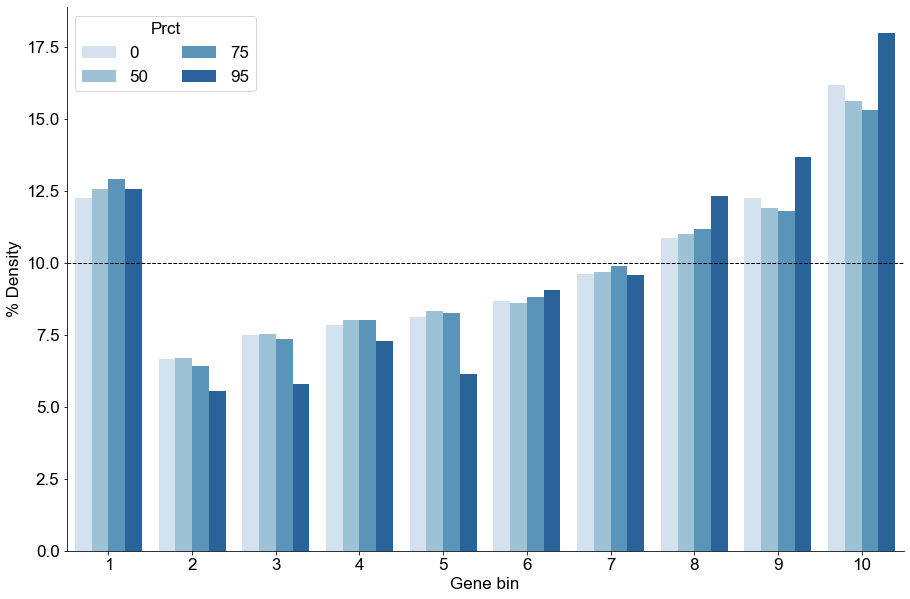

In [57]:
nb_bin = 10

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Prct'].isin([0, 50,75,95])]

# concat_df_distribution_ratios = concat_df_distribution.reset_index()
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
# concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
# concat_df_distribution_ratios.head()

from colour import Color
# Color('red')
# palette = ['#b1bacf', '#7687ab', '#3c5488']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Prct', palette='Blues')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='Prct', ncol=2)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


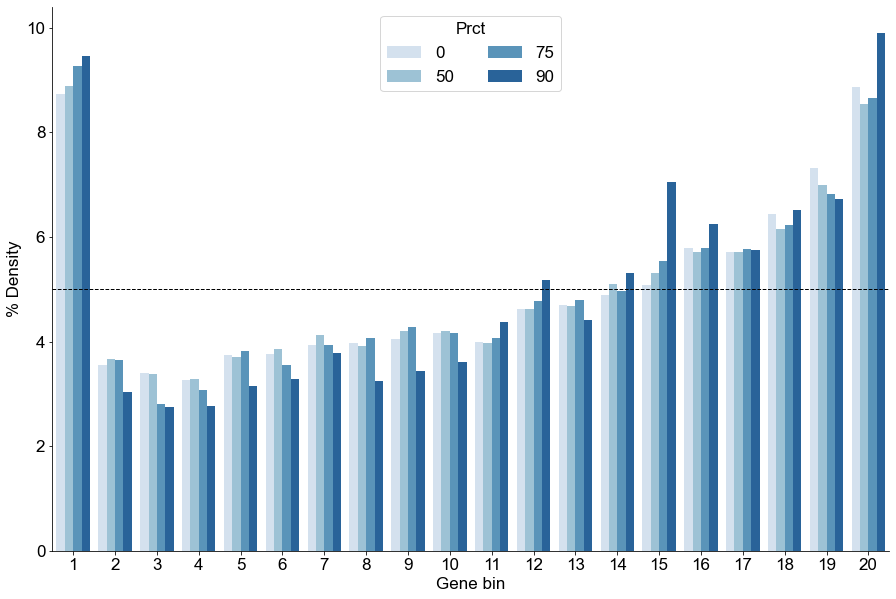

In [135]:
nb_bin = 20

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Prct'].isin([0, 50,75,90])]

# concat_df_distribution_ratios = concat_df_distribution.reset_index()
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
# concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
# concat_df_distribution_ratios.head()

from colour import Color
# Color('red')
# palette = ['#b1bacf', '#7687ab', '#3c5488']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Prct', palette='Blues')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='Prct', ncol=2)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


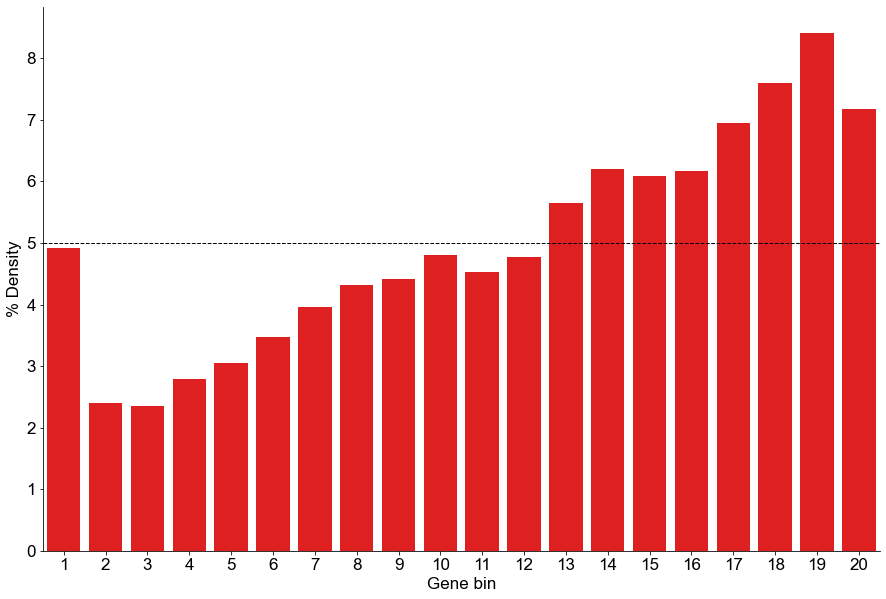

In [18]:
nb_bin = 20

concat_df_distribution_ratios = pd.read_excel("/gstock/EXOTIC/data/VARIATIONS/pathogenic_distribution.xlsx").set_index('Unnamed: 0').drop(['Sum'], axis=1)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[['Ratio']].melt()

plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='variable', y='value', color='red')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


In [35]:
concat_df_distribution_ratios

,Bin_num,Total,Ratio,Type,Filters,Const_Alt,dext
0,1,12743,6.342673,Gene,Const-None,Const,None
1,2,10471,5.211812,Gene,Const-None,Const,None
2,3,9926,4.940545,Gene,Const-None,Const,None
3,4,10005,4.979867,Gene,Const-None,Const,None
4,5,9656,4.806156,Gene,Const-None,Const,None
...,...,...,...,...,...,...,...
155,16,353,5.038538,Exons,Alt-UP,Alt,UP
156,17,351,5.009991,Exons,Alt-UP,Alt,UP
157,18,399,5.695118,Exons,Alt-UP,Alt,UP
158,19,453,6.465886,Exons,Alt-UP,Alt,UP


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


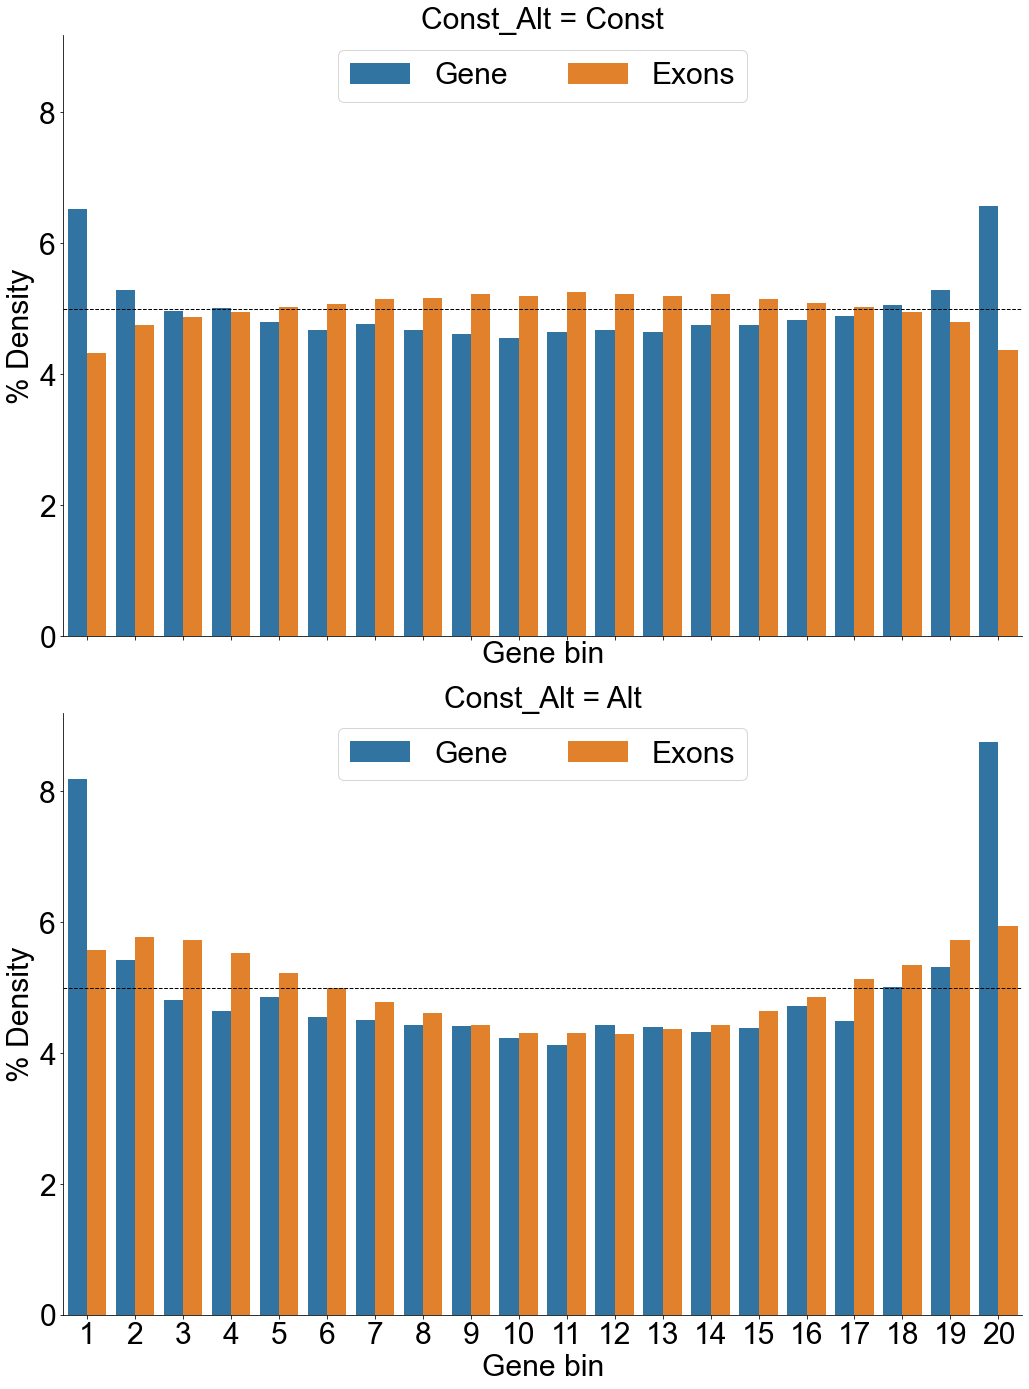

In [47]:
nb_bin = 20

concat_df_distribution_ratios = pd.read_excel("/gstock/EXOTIC/data/GENOMICS/TMP/distribution_exons_const_alt.xlsx")
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['']]

# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[['Ratio']].melt()

plt.rcParams.update({'font.size' : 30})


# f, ax = plt.subplots(figsize=(15,10))
g = sns.FacetGrid(concat_df_distribution_ratios, row="Const_Alt",  height=10, aspect=1.5)
g.map(sns.barplot, 'Bin_num', 'Ratio', 'Type', palette=sns.color_palette())
# sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='Ratio', hue='Type')
for ax in g.axes.ravel():
    ax.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
    ax.set_xlabel('Gene bin')
    ax.legend(loc='upper center', ncol=2)
    # plt.xticklabels(pl)
    ax.set_ylabel('% Density')
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


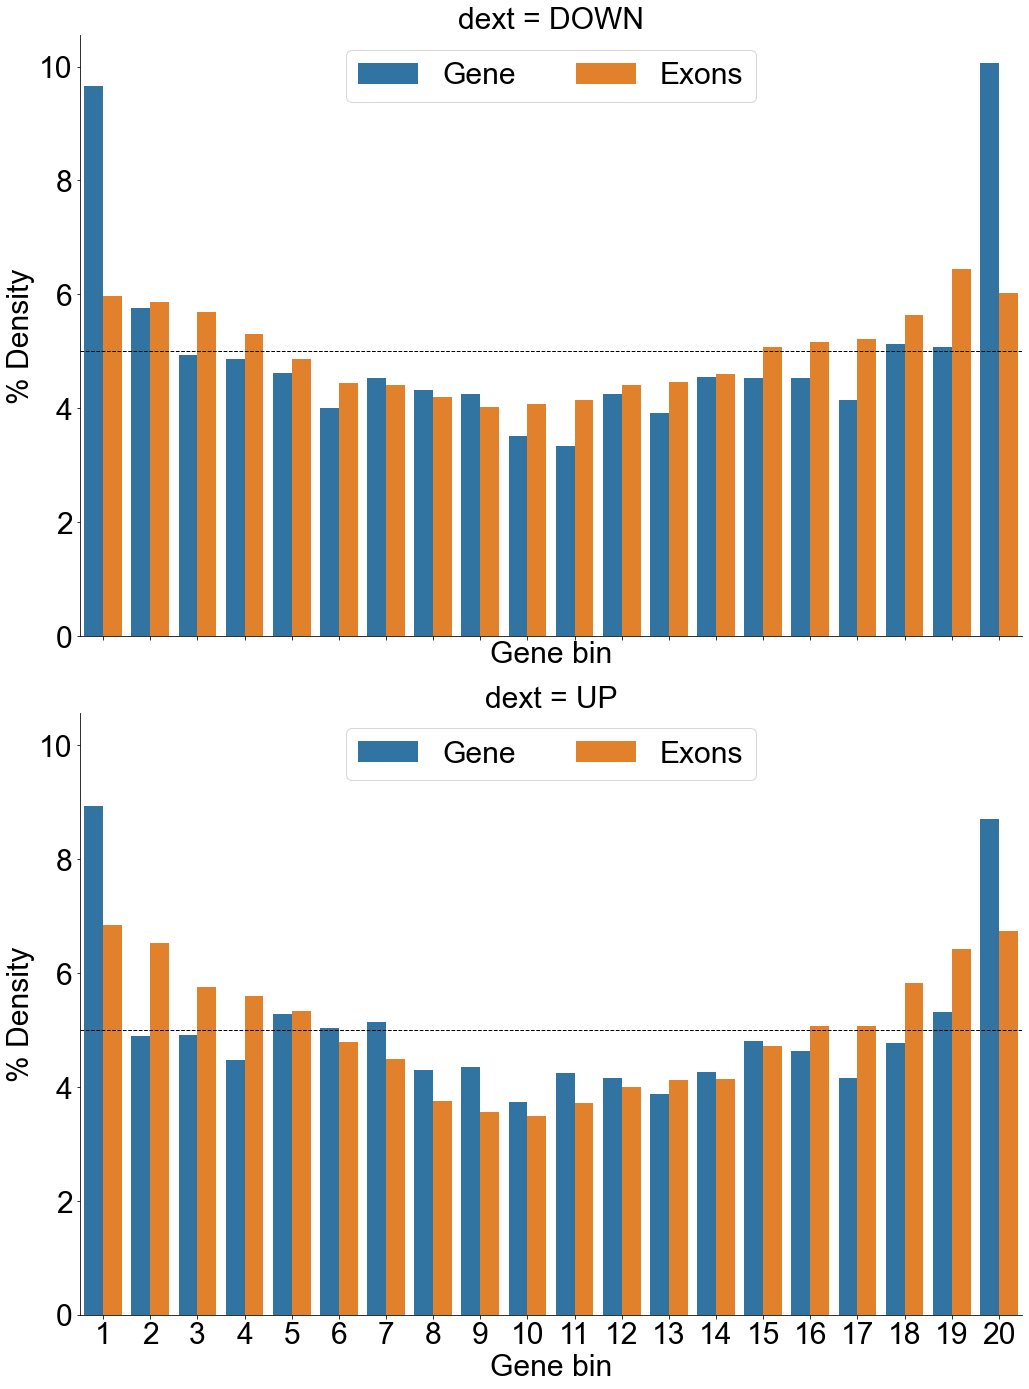

In [50]:
nb_bin = 20

concat_df_distribution_ratios = pd.read_excel("/gstock/EXOTIC/data/GENOMICS/TMP/distribution_exons_dext.xlsx")
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['']]

# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[['Ratio']].melt()

plt.rcParams.update({'font.size' : 30})


# f, ax = plt.subplots(figsize=(15,10))
g = sns.FacetGrid(concat_df_distribution_ratios, row="dext",  height=10, aspect=1.5)
g.map(sns.barplot, 'Bin_num', 'Ratio', 'Type', palette=sns.color_palette())
# sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='Ratio', hue='Type')
for ax in g.axes.ravel():
    ax.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
    ax.set_xlabel('Gene bin')
    ax.legend(loc='upper center', ncol=2)
    # plt.xticklabels(pl)
    ax.set_ylabel('% Density')
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)


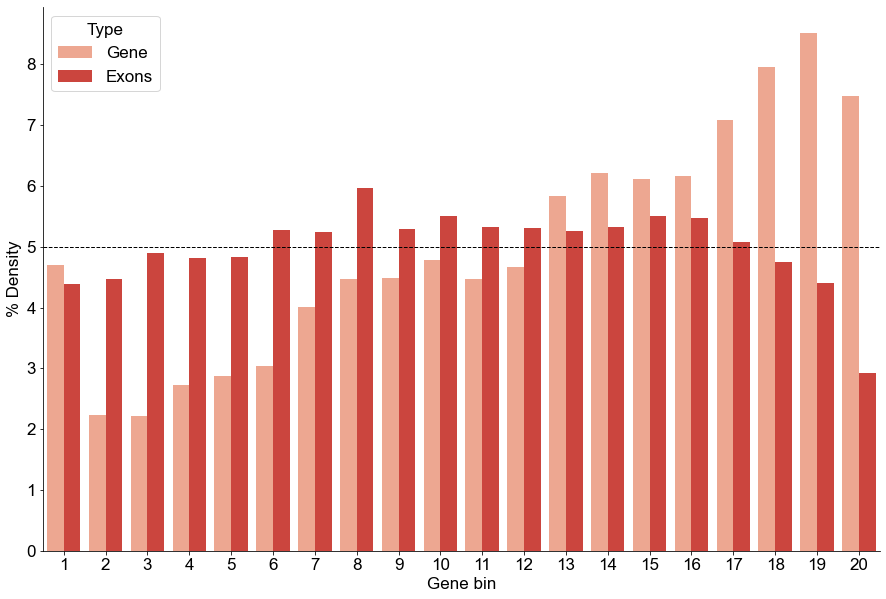

In [54]:
nb_bin = 20

concat_df_distribution_ratios = pd.read_excel("/gstock/EXOTIC/data/GENOMICS/TMP/distribution_clinvar.xlsx")
concat_df_distribution_ratios

# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[['Ratio']].melt()

plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='Ratio', hue='Type', palette='Reds')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


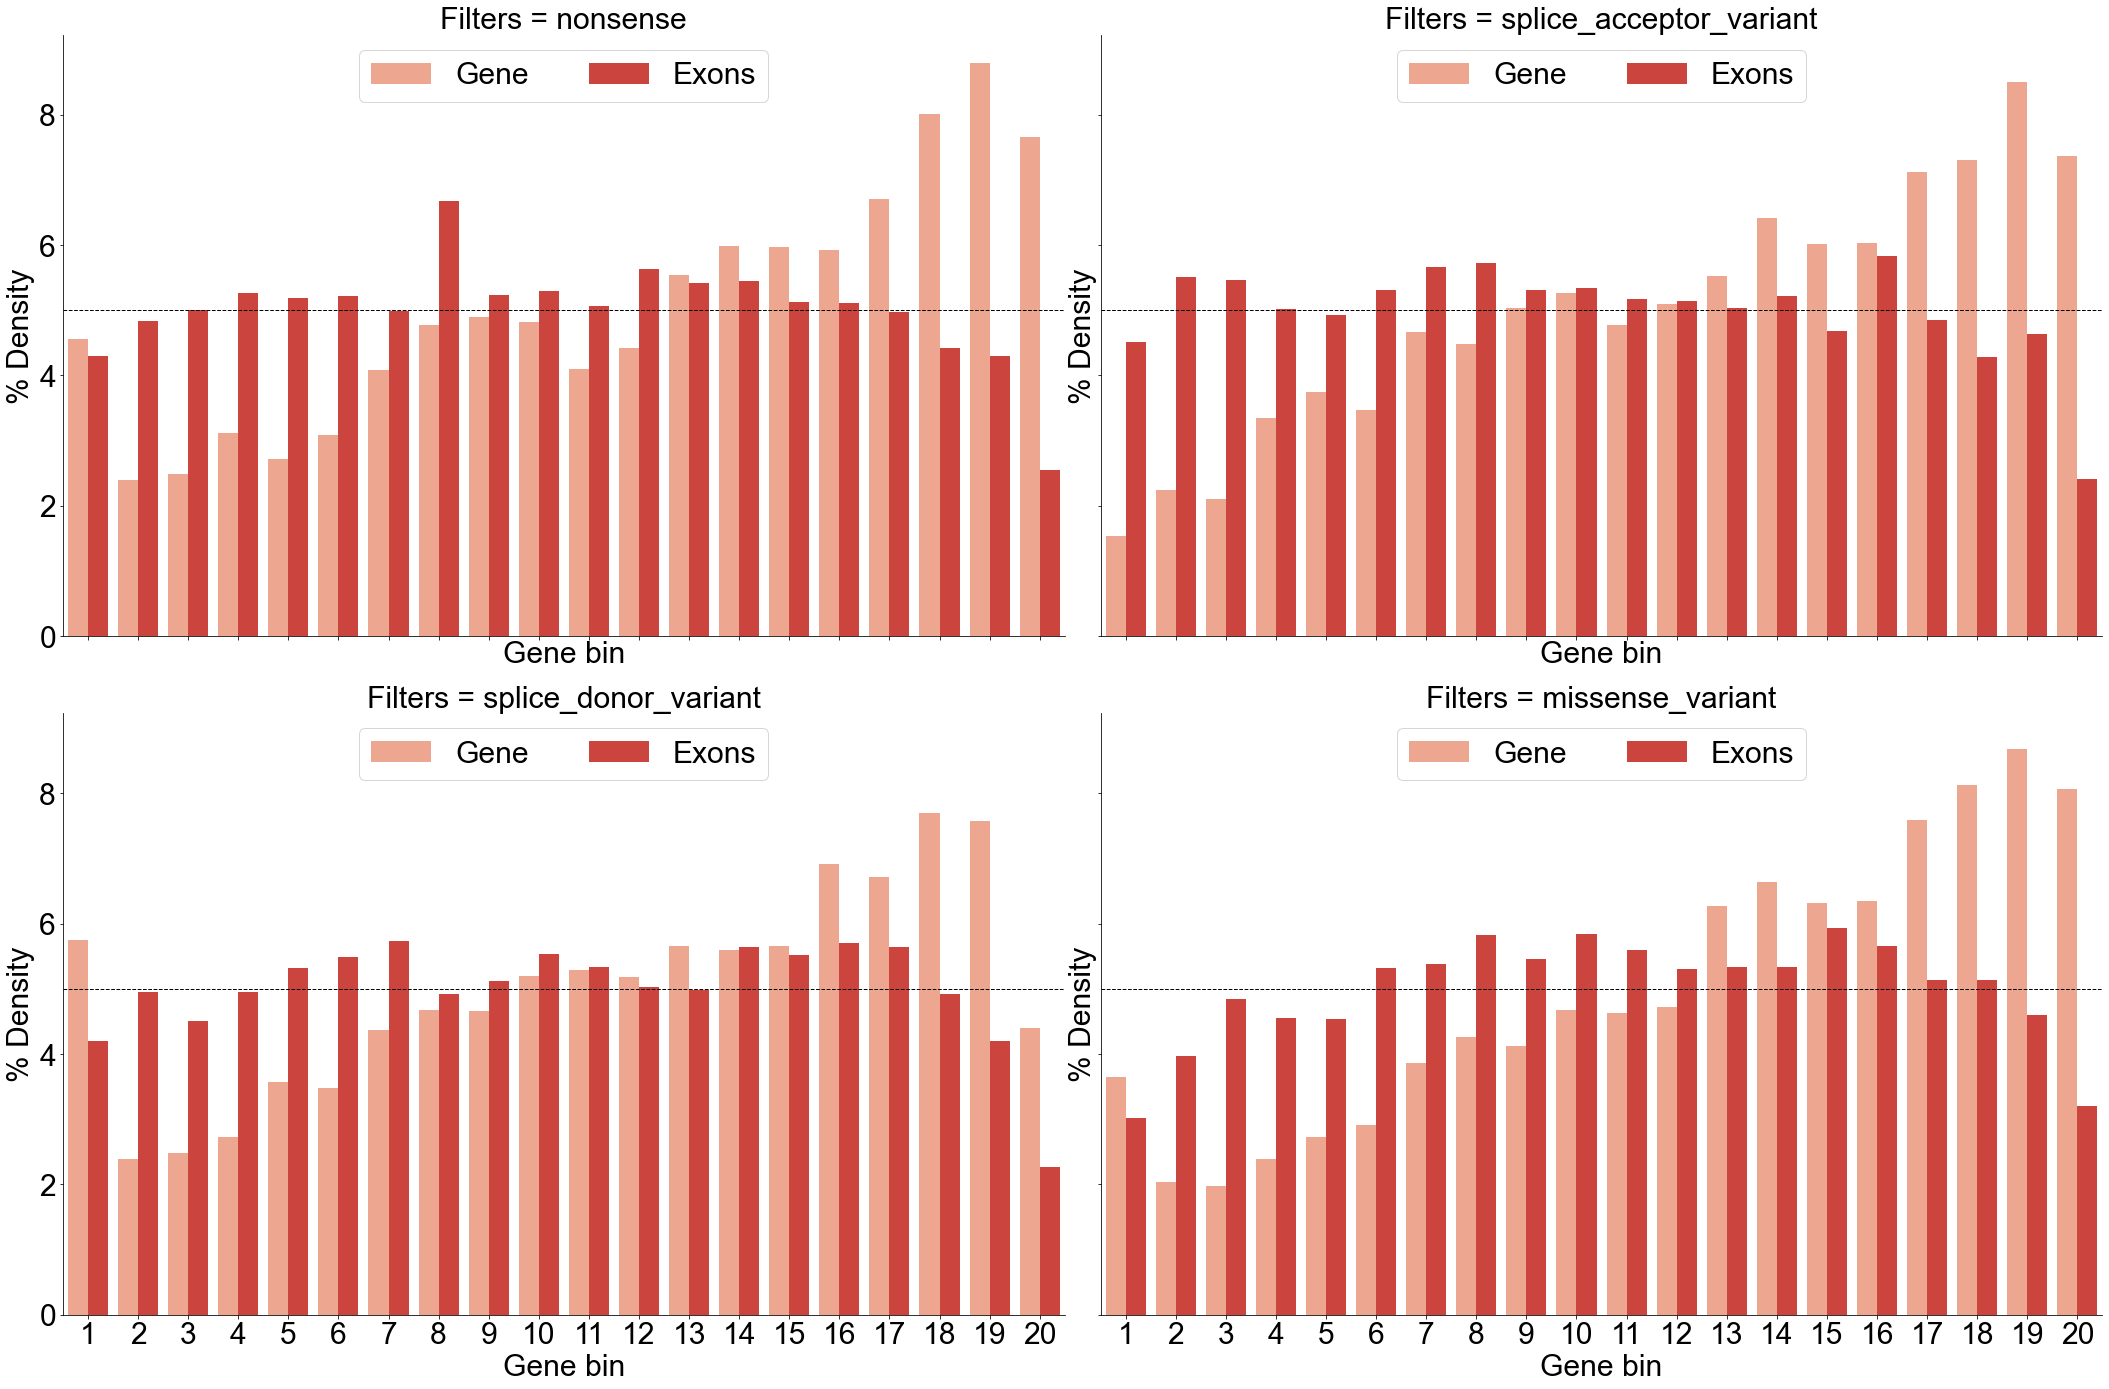

In [67]:
nb_bin = 20

concat_df_distribution_ratios = pd.read_excel("/gstock/EXOTIC/data/GENOMICS/TMP/distribution_clinvar_mc.xlsx")
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['']]
# concat_df_distribution_ratios.groupby(['Filters', 'Type'])['Total'].sum()
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Filters'].isin(['nonsense', 'splice_acceptor_variant', 'splice_donor_variant', 'missense_variant',])]
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Filters'].isin(['missense_variant', 'nonsense', ''])]
# concat_df_distribution_ratios.Filters.unique()

# # concat_df_distribution_ratios = concat_df_distribution_ratios.loc[['Ratio']].melt()

plt.rcParams.update({'font.size' : 30})


# f, ax = plt.subplots(figsize=(15,10))
g = sns.FacetGrid(concat_df_distribution_ratios, col="Filters", col_wrap=2,  height=10, aspect=1.5)
g.map(sns.barplot, 'Bin_num', 'Ratio', 'Type', palette='Reds')
# sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='Ratio', hue='Type')
for ax in g.axes.ravel():
    ax.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
    ax.set_xlabel('Gene bin')
    ax.legend(loc='upper center', ncol=2)
    # plt.xticklabels(pl)
    ax.set_ylabel('% Density')
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)


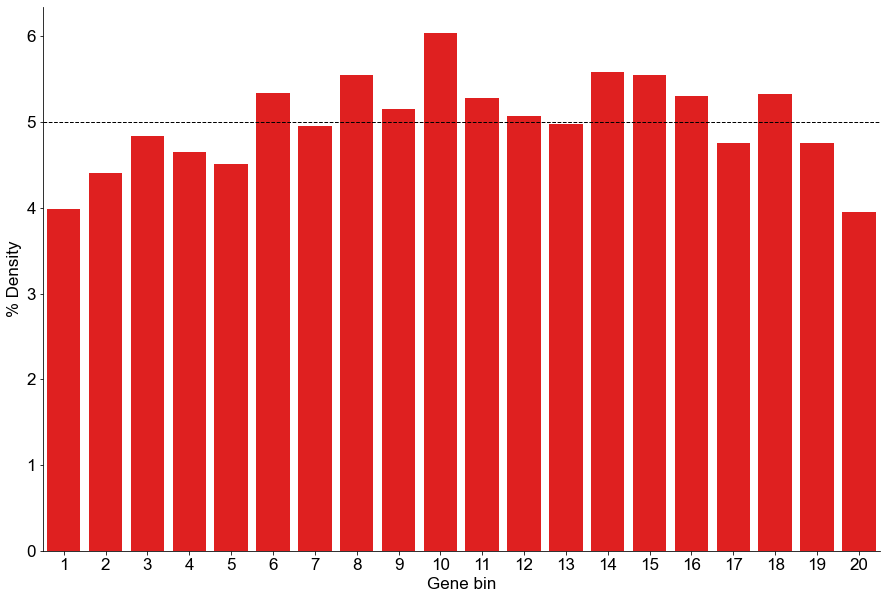

In [21]:
nb_bin = 20

concat_df_distribution_ratios = pd.read_excel("/gstock/EXOTIC/data/VARIATIONS/pathogenic_distribution_missense_exons.xlsx")
concat_df_distribution_ratios

# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[['Ratio']].melt()

plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='Ratio', color='red')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


     Prct Total/Ratio  Cutoff  Nb_bin Up/Down  Bin_num   value
72     60       Total       0      20      up        1  2977.0
74     60       Total       0      20      up        2  1217.0
76     60       Total       0      20      up        3  1174.0
78     60       Total       0      20      up        4  1132.0
80     60       Total       0      20      up        5  1292.0
82     60       Total       0      20      up        6  1309.0
84     60       Total       0      20      up        7  1358.0
86     60       Total       0      20      up        8  1371.0
88     60       Total       0      20      up        9  1399.0
90     60       Total       0      20      up       10  1431.0
92     60       Total       0      20      up       11  1384.0
94     60       Total       0      20      up       12  1611.0
96     60       Total       0      20      up       13  1626.0
98     60       Total       0      20      up       14  1698.0
100    60       Total       0      20      up       15 

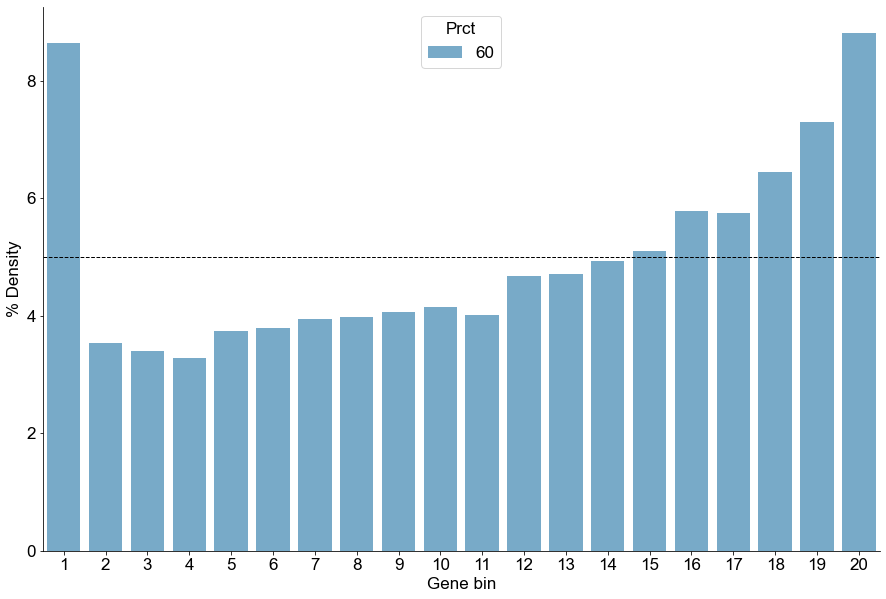

In [204]:
nb_bin = 20

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_all'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
print(concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Total')])
r = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
r['Enrichment'] = r['value'] / (100/20)
print(r)

concat_df_distribution_ratios = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Prct'].isin([0, 50,75,90])]

# concat_df_distribution_ratios = concat_df_distribution.reset_index()
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
# concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
# concat_df_distribution_ratios.head()

from colour import Color
# Color('red')
# palette = ['#b1bacf', '#7687ab', '#3c5488']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Prct', palette='Blues')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='Prct', ncol=2)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


     Prct Total/Ratio  Cutoff  Nb_bin Up/Down  Bin_num   value
112    60       Total       0      20    down        1  2977.0
114    60       Total       0      20    down        2  1217.0
116    60       Total       0      20    down        3  1174.0
118    60       Total       0      20    down        4  1132.0
120    60       Total       0      20    down        5  1292.0
122    60       Total       0      20    down        6  1309.0
124    60       Total       0      20    down        7  1358.0
126    60       Total       0      20    down        8  1371.0
128    60       Total       0      20    down        9  1399.0
130    60       Total       0      20    down       10  1431.0
132    60       Total       0      20    down       11  1384.0
134    60       Total       0      20    down       12  1611.0
136    60       Total       0      20    down       13  1626.0
138    60       Total       0      20    down       14  1698.0
140    60       Total       0      20    down       15 

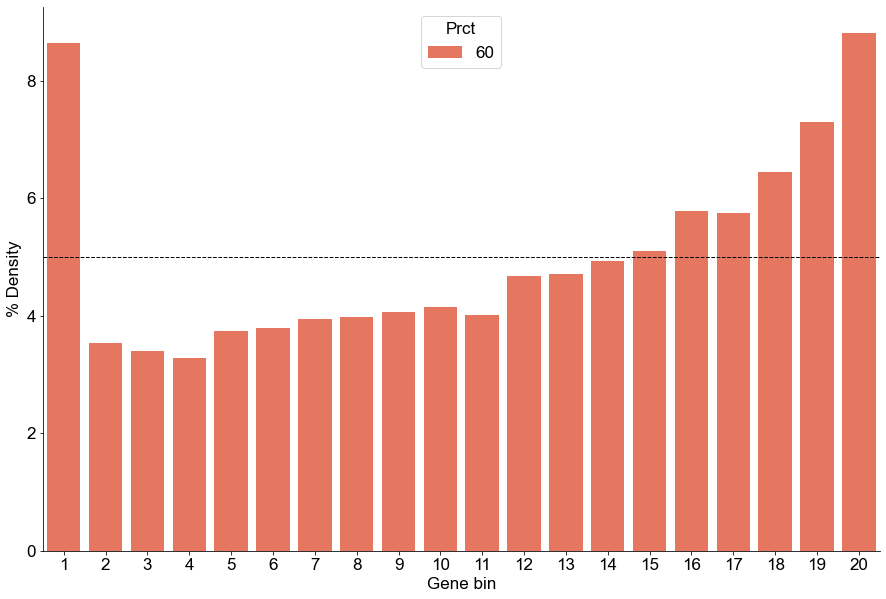

In [151]:
nb_bin = 20

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_all'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
print(concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Total')])

concat_df_distribution_ratios = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Prct'].isin([0, 50,75,90])]

# concat_df_distribution_ratios = concat_df_distribution.reset_index()
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
# concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
# concat_df_distribution_ratios.head()

from colour import Color
# Color('red')
# palette = ['#b1bacf', '#7687ab', '#3c5488']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Prct', palette='Reds')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='Prct', ncol=2)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


     Prct Total/Ratio  Cutoff  Nb_bin Up/Down  Bin_num   value
72     60       Total       0      20      up        1  2977.0
74     60       Total       0      20      up        2  1217.0
76     60       Total       0      20      up        3  1174.0
78     60       Total       0      20      up        4  1132.0
80     60       Total       0      20      up        5  1292.0
82     60       Total       0      20      up        6  1309.0
84     60       Total       0      20      up        7  1358.0
86     60       Total       0      20      up        8  1371.0
88     60       Total       0      20      up        9  1399.0
90     60       Total       0      20      up       10  1431.0
92     60       Total       0      20      up       11  1384.0
94     60       Total       0      20      up       12  1611.0
96     60       Total       0      20      up       13  1626.0
98     60       Total       0      20      up       14  1698.0
100    60       Total       0      20      up       15 

Text(-2, 12.5, 'b.')

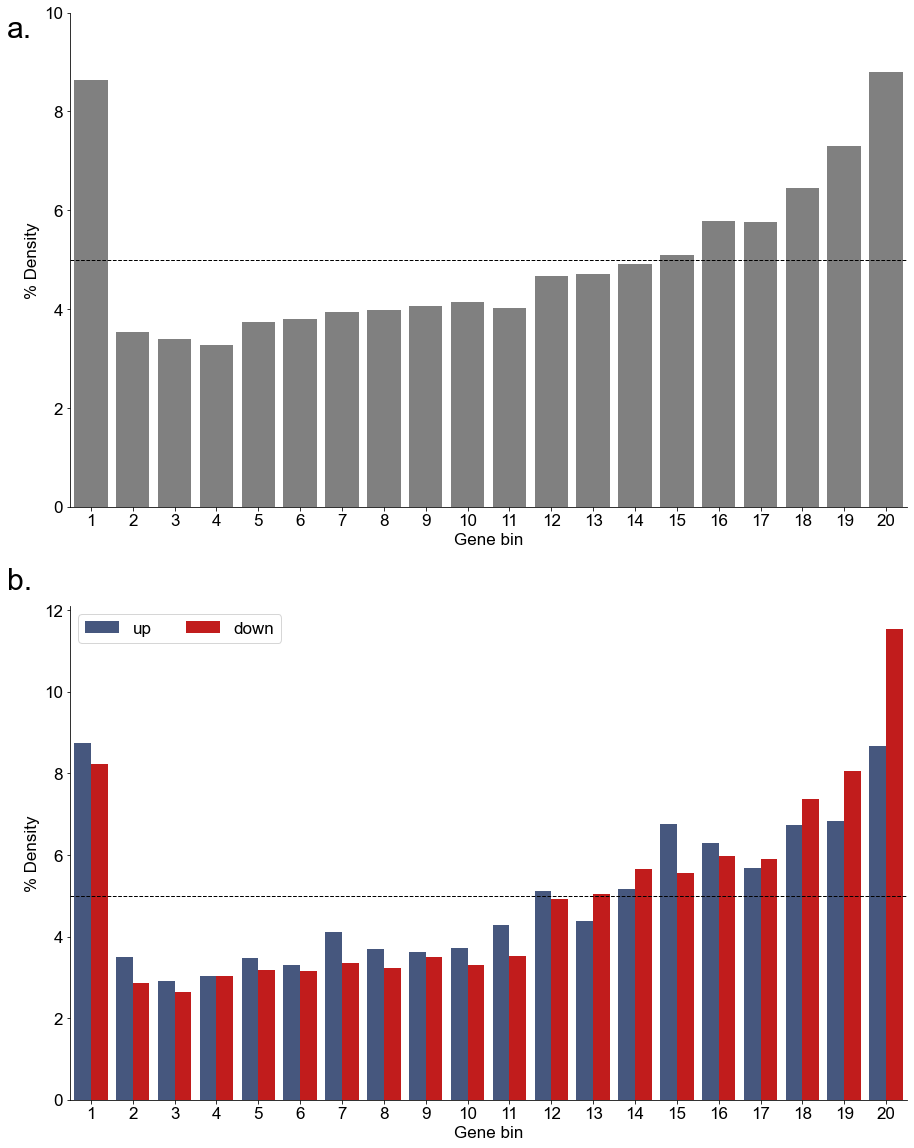

In [234]:
plt.rcParams.update({'font.size' : 17})

f, ax = plt.subplots(nrows=2, figsize=(15,20))

nb_bin = 20

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_all'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
print(concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Total')])
r = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
r['Enrichment'] = r['value'] / (100/20)
print(r)

concat_df_distribution_ratios = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]

sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Prct', palette=['grey'], ax=ax[0])
ax[0].axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
ax[0].set_xlabel('Gene bin')
ax[0].set_ylabel('% Density')
ax[0].legend().remove()
ax[0].spines['top'].set_linewidth(0)
ax[0].spines['right'].set_linewidth(0)
ax[0].text(-2, 9.5, 'a.', color='black', size=30)
ax[0].set_ylim(0,10)

nb_bin = 20

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_cutoff'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
print(concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Total')])

concat_df_distribution_ratios = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Prct'].isin([0, 50,75,90])]
r = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
r['Enrichment'] = r['value'] / (100/20)
print(r)

sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Up/Down', palette=['#3C5488FF', '#DC0000FF'], ax=ax[1])
ax[1].axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
ax[1].set_xlabel('Gene bin')
ax[1].set_ylabel('% Density')
ax[1].legend(ncol=2)
ax[1].spines['top'].set_linewidth(0)
ax[1].spines['right'].set_linewidth(0)
ax[1].text(-2, 12.5, 'b.', color='black', size=30)

     Prct Total/Ratio  Cutoff  Nb_bin Up/Down  Bin_num  value
72     60       Total     0.5      20      up        1  324.0
74     60       Total     0.5      20      up        2  130.0
76     60       Total     0.5      20      up        3  108.0
78     60       Total     0.5      20      up        4  112.0
80     60       Total     0.5      20      up        5  129.0
82     60       Total     0.5      20      up        6  122.0
84     60       Total     0.5      20      up        7  152.0
86     60       Total     0.5      20      up        8  137.0
88     60       Total     0.5      20      up        9  134.0
90     60       Total     0.5      20      up       10  138.0
92     60       Total     0.5      20      up       11  159.0
94     60       Total     0.5      20      up       12  189.0
96     60       Total     0.5      20      up       13  162.0
98     60       Total     0.5      20      up       14  191.0
100    60       Total     0.5      20      up       15  250.0
102    6

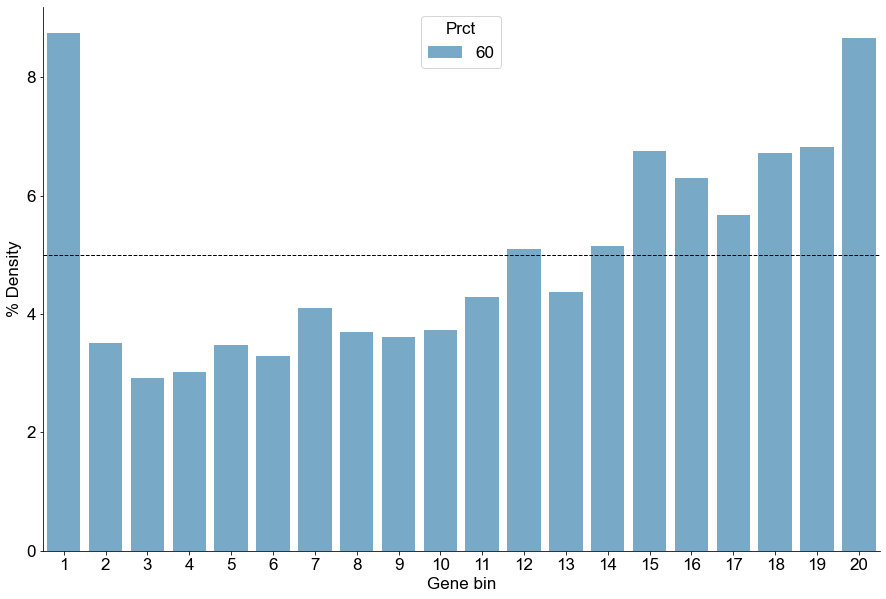

In [205]:
nb_bin = 20

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_cutoff'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
print(concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Total')])

concat_df_distribution_ratios = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Prct'].isin([0, 50,75,90])]
r = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
r['Enrichment'] = r['value'] / (100/20)
print(r)
# concat_df_distribution_ratios = concat_df_distribution.reset_index()
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
# concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
# concat_df_distribution_ratios.head()

from colour import Color
# Color('red')
# palette = ['#b1bacf', '#7687ab', '#3c5488']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Prct', palette='Blues')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='Prct', ncol=2)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


     Prct Total/Ratio  Cutoff  Nb_bin Up/Down  Bin_num  value
112    60       Total     0.5      20    down        1  345.0
114    60       Total     0.5      20    down        2  120.0
116    60       Total     0.5      20    down        3  111.0
118    60       Total     0.5      20    down        4  127.0
120    60       Total     0.5      20    down        5  133.0
122    60       Total     0.5      20    down        6  132.0
124    60       Total     0.5      20    down        7  141.0
126    60       Total     0.5      20    down        8  136.0
128    60       Total     0.5      20    down        9  147.0
130    60       Total     0.5      20    down       10  139.0
132    60       Total     0.5      20    down       11  148.0
134    60       Total     0.5      20    down       12  206.0
136    60       Total     0.5      20    down       13  212.0
138    60       Total     0.5      20    down       14  237.0
140    60       Total     0.5      20    down       15  233.0
142    6

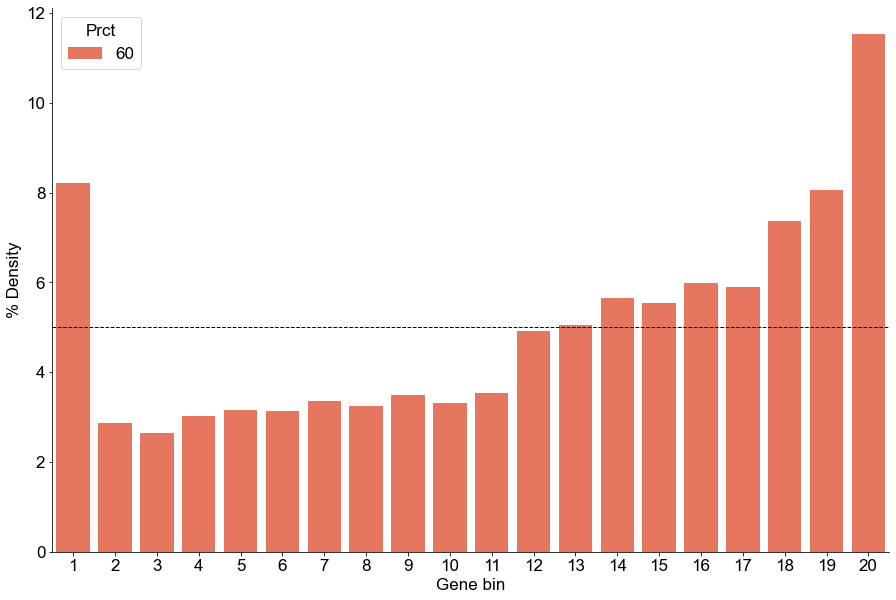

In [215]:
nb_bin = 20

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_cutoff'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)


print(concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Total')])


r = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin)  & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
r['Enrichment'] = r['value'] / (100/20)
print(r[['Bin_num', 'Enrichment']].round(2))


concat_df_distribution_ratios = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]


# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Prct'].isin([0, 50,75,90])]

# concat_df_distribution_ratios = concat_df_distribution.reset_index()
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
# concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
# concat_df_distribution_ratios.head()

from colour import Color
# Color('red')
# palette = ['#b1bacf', '#7687ab', '#3c5488']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Prct', palette='Reds')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='Prct', ncol=2)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


     Prct Total/Ratio  Cutoff  Nb_bin Up/Down  Bin_num  value
72     60       Total     0.5      20      up        1   84.0
74     60       Total     0.5      20      up        2   42.0
76     60       Total     0.5      20      up        3   40.0
78     60       Total     0.5      20      up        4   30.0
80     60       Total     0.5      20      up        5   36.0
82     60       Total     0.5      20      up        6   38.0
84     60       Total     0.5      20      up        7   54.0
86     60       Total     0.5      20      up        8   51.0
88     60       Total     0.5      20      up        9   38.0
90     60       Total     0.5      20      up       10   38.0
92     60       Total     0.5      20      up       11   37.0
94     60       Total     0.5      20      up       12   50.0
96     60       Total     0.5      20      up       13   32.0
98     60       Total     0.5      20      up       14   45.0
100    60       Total     0.5      20      up       15   50.0
102    6

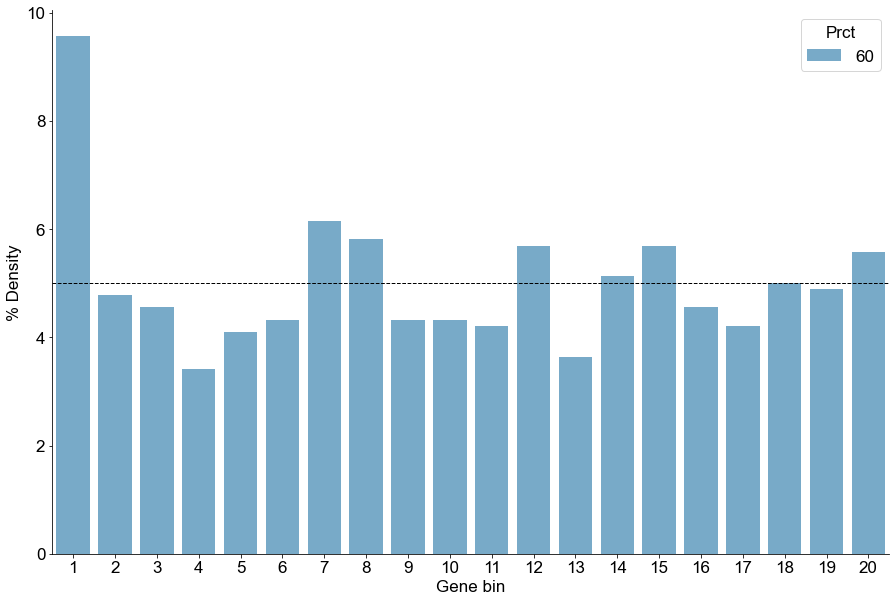

In [146]:
nb_bin = 20

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_cutoff_specific'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
print(concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Total')])

concat_df_distribution_ratios = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Prct'].isin([0, 50,75,90])]

# concat_df_distribution_ratios = concat_df_distribution.reset_index()
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
# concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
# concat_df_distribution_ratios.head()

from colour import Color
# Color('red')
# palette = ['#b1bacf', '#7687ab', '#3c5488']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Prct', palette='Blues')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='Prct', ncol=2)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


     Prct Total/Ratio  Cutoff  Nb_bin Up/Down  Bin_num  value
112    60       Total     0.5      20    down        1  113.0
114    60       Total     0.5      20    down        2   35.0
116    60       Total     0.5      20    down        3   37.0
118    60       Total     0.5      20    down        4   58.0
120    60       Total     0.5      20    down        5   54.0
122    60       Total     0.5      20    down        6   58.0
124    60       Total     0.5      20    down        7   47.0
126    60       Total     0.5      20    down        8   44.0
128    60       Total     0.5      20    down        9   59.0
130    60       Total     0.5      20    down       10   53.0
132    60       Total     0.5      20    down       11   49.0
134    60       Total     0.5      20    down       12   71.0
136    60       Total     0.5      20    down       13   63.0
138    60       Total     0.5      20    down       14   62.0
140    60       Total     0.5      20    down       15   55.0
142    6

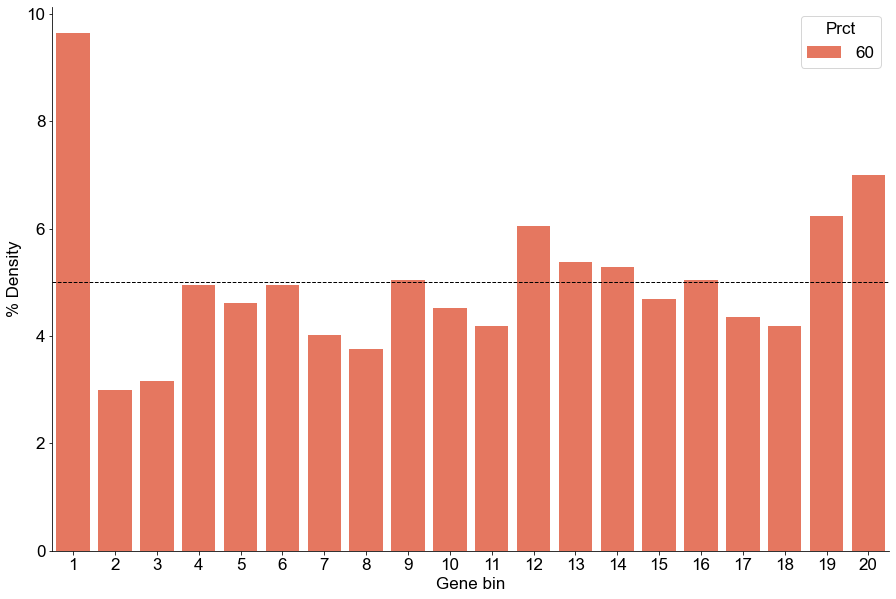

In [153]:
nb_bin = 20

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_cutoff_specific'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
print(concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Total')])

concat_df_distribution_ratios = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Prct'].isin([0, 50,75,90])]

# concat_df_distribution_ratios = concat_df_distribution.reset_index()
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
# concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
# concat_df_distribution_ratios.head()

from colour import Color
# Color('red')
# palette = ['#b1bacf', '#7687ab', '#3c5488']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Prct', palette='Reds')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='Prct', ncol=2)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


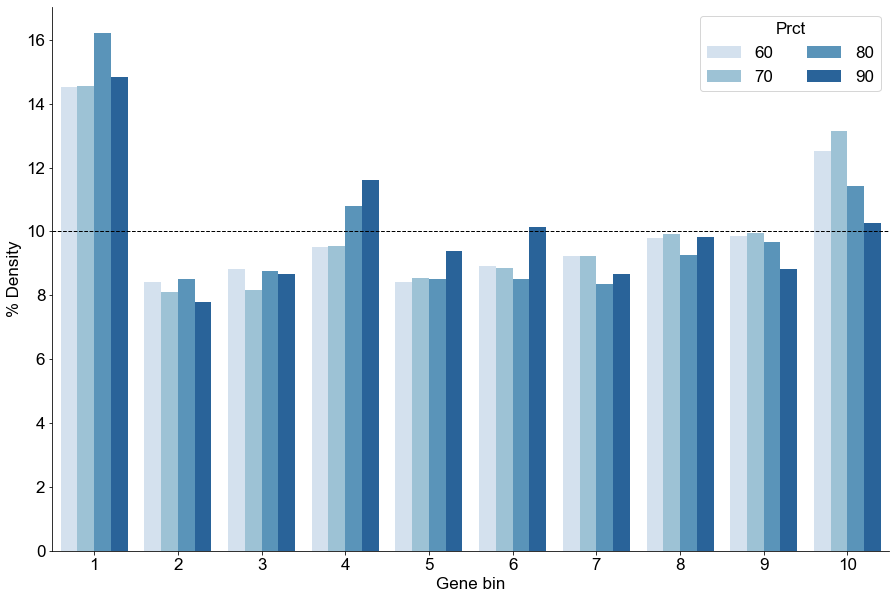

In [80]:
nb_bin = 10

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_test'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Prct'].isin([60,70,80,90])]

# concat_df_distribution_ratios = concat_df_distribution.reset_index()
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
# concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
# concat_df_distribution_ratios.head()

from colour import Color
# Color('red')
# palette = ['#b1bacf', '#7687ab', '#3c5488']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Prct', palette='Blues')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='Prct', ncol=2)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


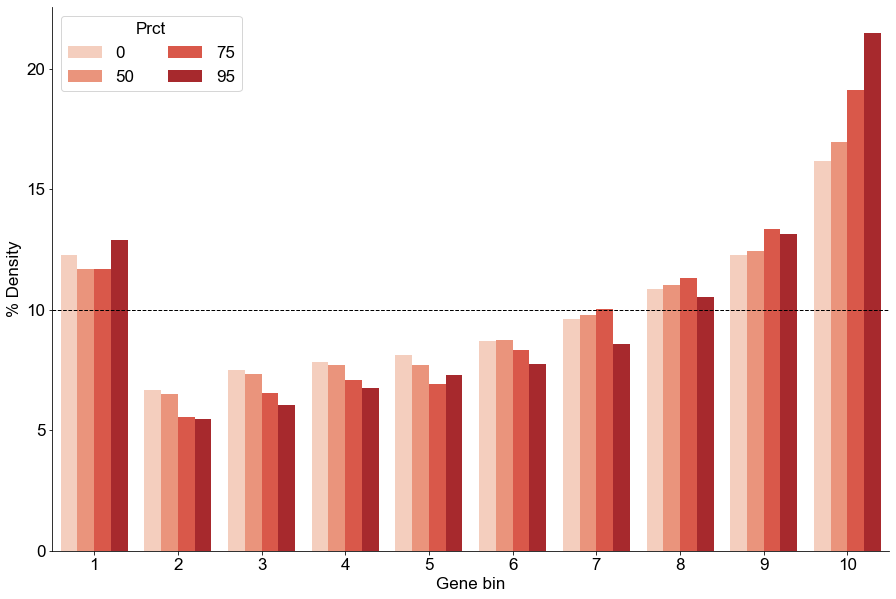

In [79]:
nb_bin = 10

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Prct'].isin([0, 50,75,95])]

# concat_df_distribution_ratios = concat_df_distribution.reset_index()
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
# concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
# concat_df_distribution_ratios.head()

from colour import Color
# Color('red')
# palette = ['#b1bacf', '#7687ab', '#3c5488']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Prct', palette='Reds')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='Prct', ncol=2)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


   Total/Ratio   Type  Cutoff  Nb_bin Up/Down  Prct  Bin_num    value
0        Total   True     0.5      20      up   0.6        1    325.0
2        Total  False     0.5      20      up   0.6        1  11403.0
4        Total   True     0.5      20      up   0.6        2    381.0
6        Total  False     0.5      20      up   0.6        2  13725.0
8        Total   True     0.5      20      up   0.6        3    414.0
10       Total  False     0.5      20      up   0.6        3  10761.0
12       Total   True     0.5      20      up   0.6        4    543.0
14       Total  False     0.5      20      up   0.6        4  14596.0
16       Total   True     0.5      20      up   0.6        5    432.0
18       Total  False     0.5      20      up   0.6        5  13803.0
20       Total   True     0.5      20      up   0.6        6    457.0
22       Total  False     0.5      20      up   0.6        6  13201.0
24       Total   True     0.5      20      up   0.6        7    451.0
26       Total  Fals

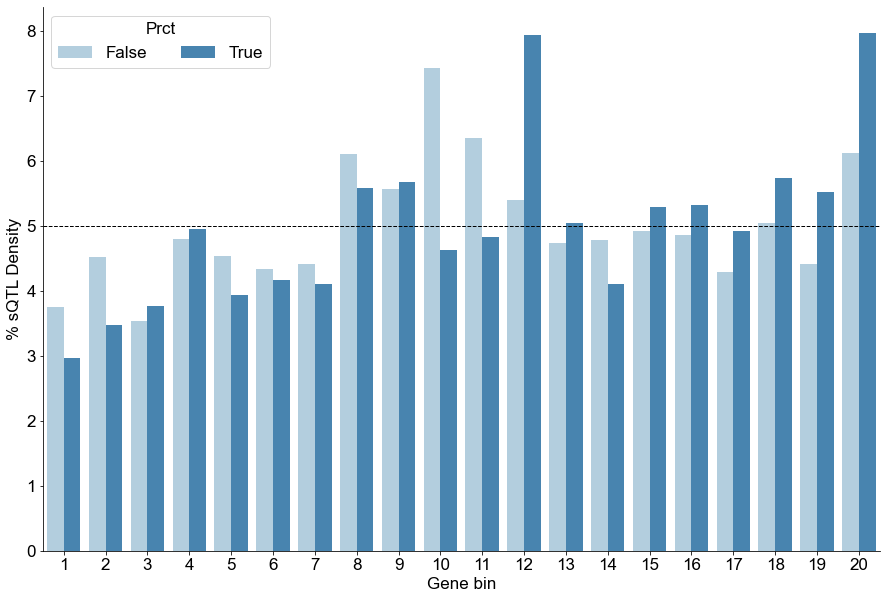

In [210]:
yaml = utils.load_config_file(config_file="../../clean/src/config_clean_clean.yaml")


nb_bin = 20

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location_cutoff'])
concat_df_distribution_ratios
print(concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Total')])

r = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Type'] == True) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
r['Enrichment'] = r['value'] / (100/20)
print(r[['Bin_num', 'Enrichment']].round(2))


r = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Type'] == False) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
r['Enrichment'] = r['value'] / (100/20)
print(r[['Bin_num', 'Enrichment']].round(2))


concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[
    (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & 
    (concat_df_distribution_ratios['Up/Down'] == "up") 
]
# concat_df_distribution_ratios.Type.value_counts()

# from colour import Color
# # Color('red')
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Type',  palette='Blues')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% sQTL Density')
ax.legend(title='Prct', ncol=4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


    Total/Ratio   Type  Cutoff  Nb_bin Up/Down  Prct  Bin_num    value
80        Total   True     0.5      20    down   0.6        1    323.0
82        Total  False     0.5      20    down   0.6        1  21456.0
84        Total   True     0.5      20    down   0.6        2    407.0
86        Total  False     0.5      20    down   0.6        2  23716.0
88        Total   True     0.5      20    down   0.6        3    317.0
90        Total  False     0.5      20    down   0.6        3  20248.0
92        Total   True     0.5      20    down   0.6        4    285.0
94        Total  False     0.5      20    down   0.6        4  23016.0
96        Total   True     0.5      20    down   0.6        5    270.0
98        Total  False     0.5      20    down   0.6        5  18766.0
100       Total   True     0.5      20    down   0.6        6    299.0
102       Total  False     0.5      20    down   0.6        6  19697.0
104       Total   True     0.5      20    down   0.6        7    360.0
106   

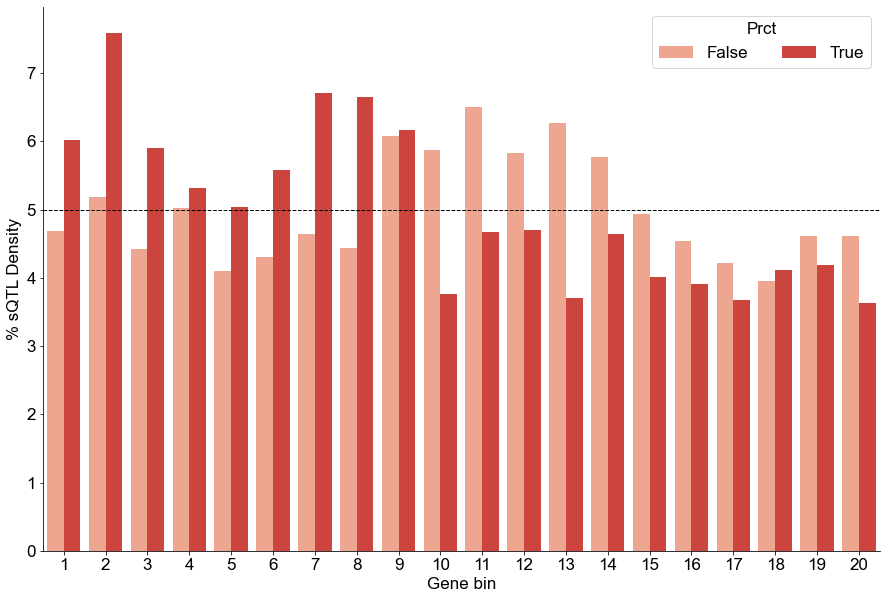

In [214]:
yaml = utils.load_config_file(config_file="../../clean/src/config_clean_clean.yaml")


nb_bin = 20

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location_cutoff'])
concat_df_distribution_ratios
print(concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Total')])


r = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Type'] == True) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
r['Enrichment'] = r['value'] / (100/20)
print(r[['Bin_num', 'Enrichment']].round(2))


r = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Type'] == False) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
r['Enrichment'] = r['value'] / (100/20)
print(r[['Bin_num', 'Enrichment']].round(2))



concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[
    (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & 
    (concat_df_distribution_ratios['Up/Down'] == "down") 
]
# concat_df_distribution_ratios.Type.value_counts()

# from colour import Color
# # Color('red')
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Type',  palette='Reds')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% sQTL Density')
ax.legend(title='Prct', ncol=4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


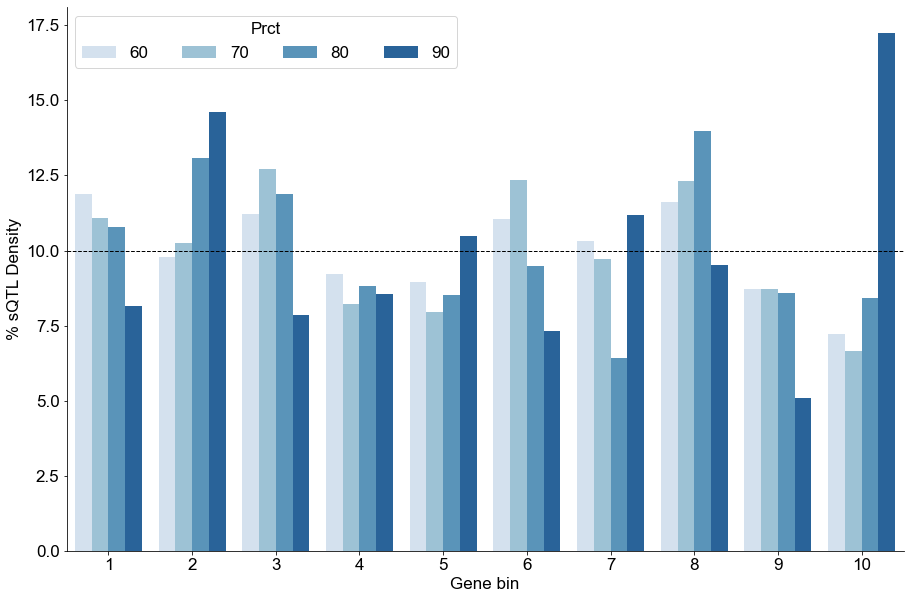

In [83]:
yaml = utils.load_config_file(config_file="../../clean/src/config_clean_clean.yaml")


nb_bin = 10

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location_test'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[
    (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & 
    (concat_df_distribution_ratios['Type'] == True) & (concat_df_distribution_ratios['Up/Down'] == "up") 
]
# concat_df_distribution_ratios.Type.value_counts()

# from colour import Color
# # Color('red')
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Prct',  palette='Blues')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% sQTL Density')
ax.legend(title='Prct', ncol=4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


In [63]:
exons_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location'])
exons_df['Type'] = 'Exon'
sqtl_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location'])

concat_df_distribution_ratios = pd.concat([exons_df, sqtl_df])
concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Prct'] == 0].Type.value_counts()

Exon    152
Name: Type, dtype: int64

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8c1f47150>
50
55
60
65
70
75
80
85
90
95


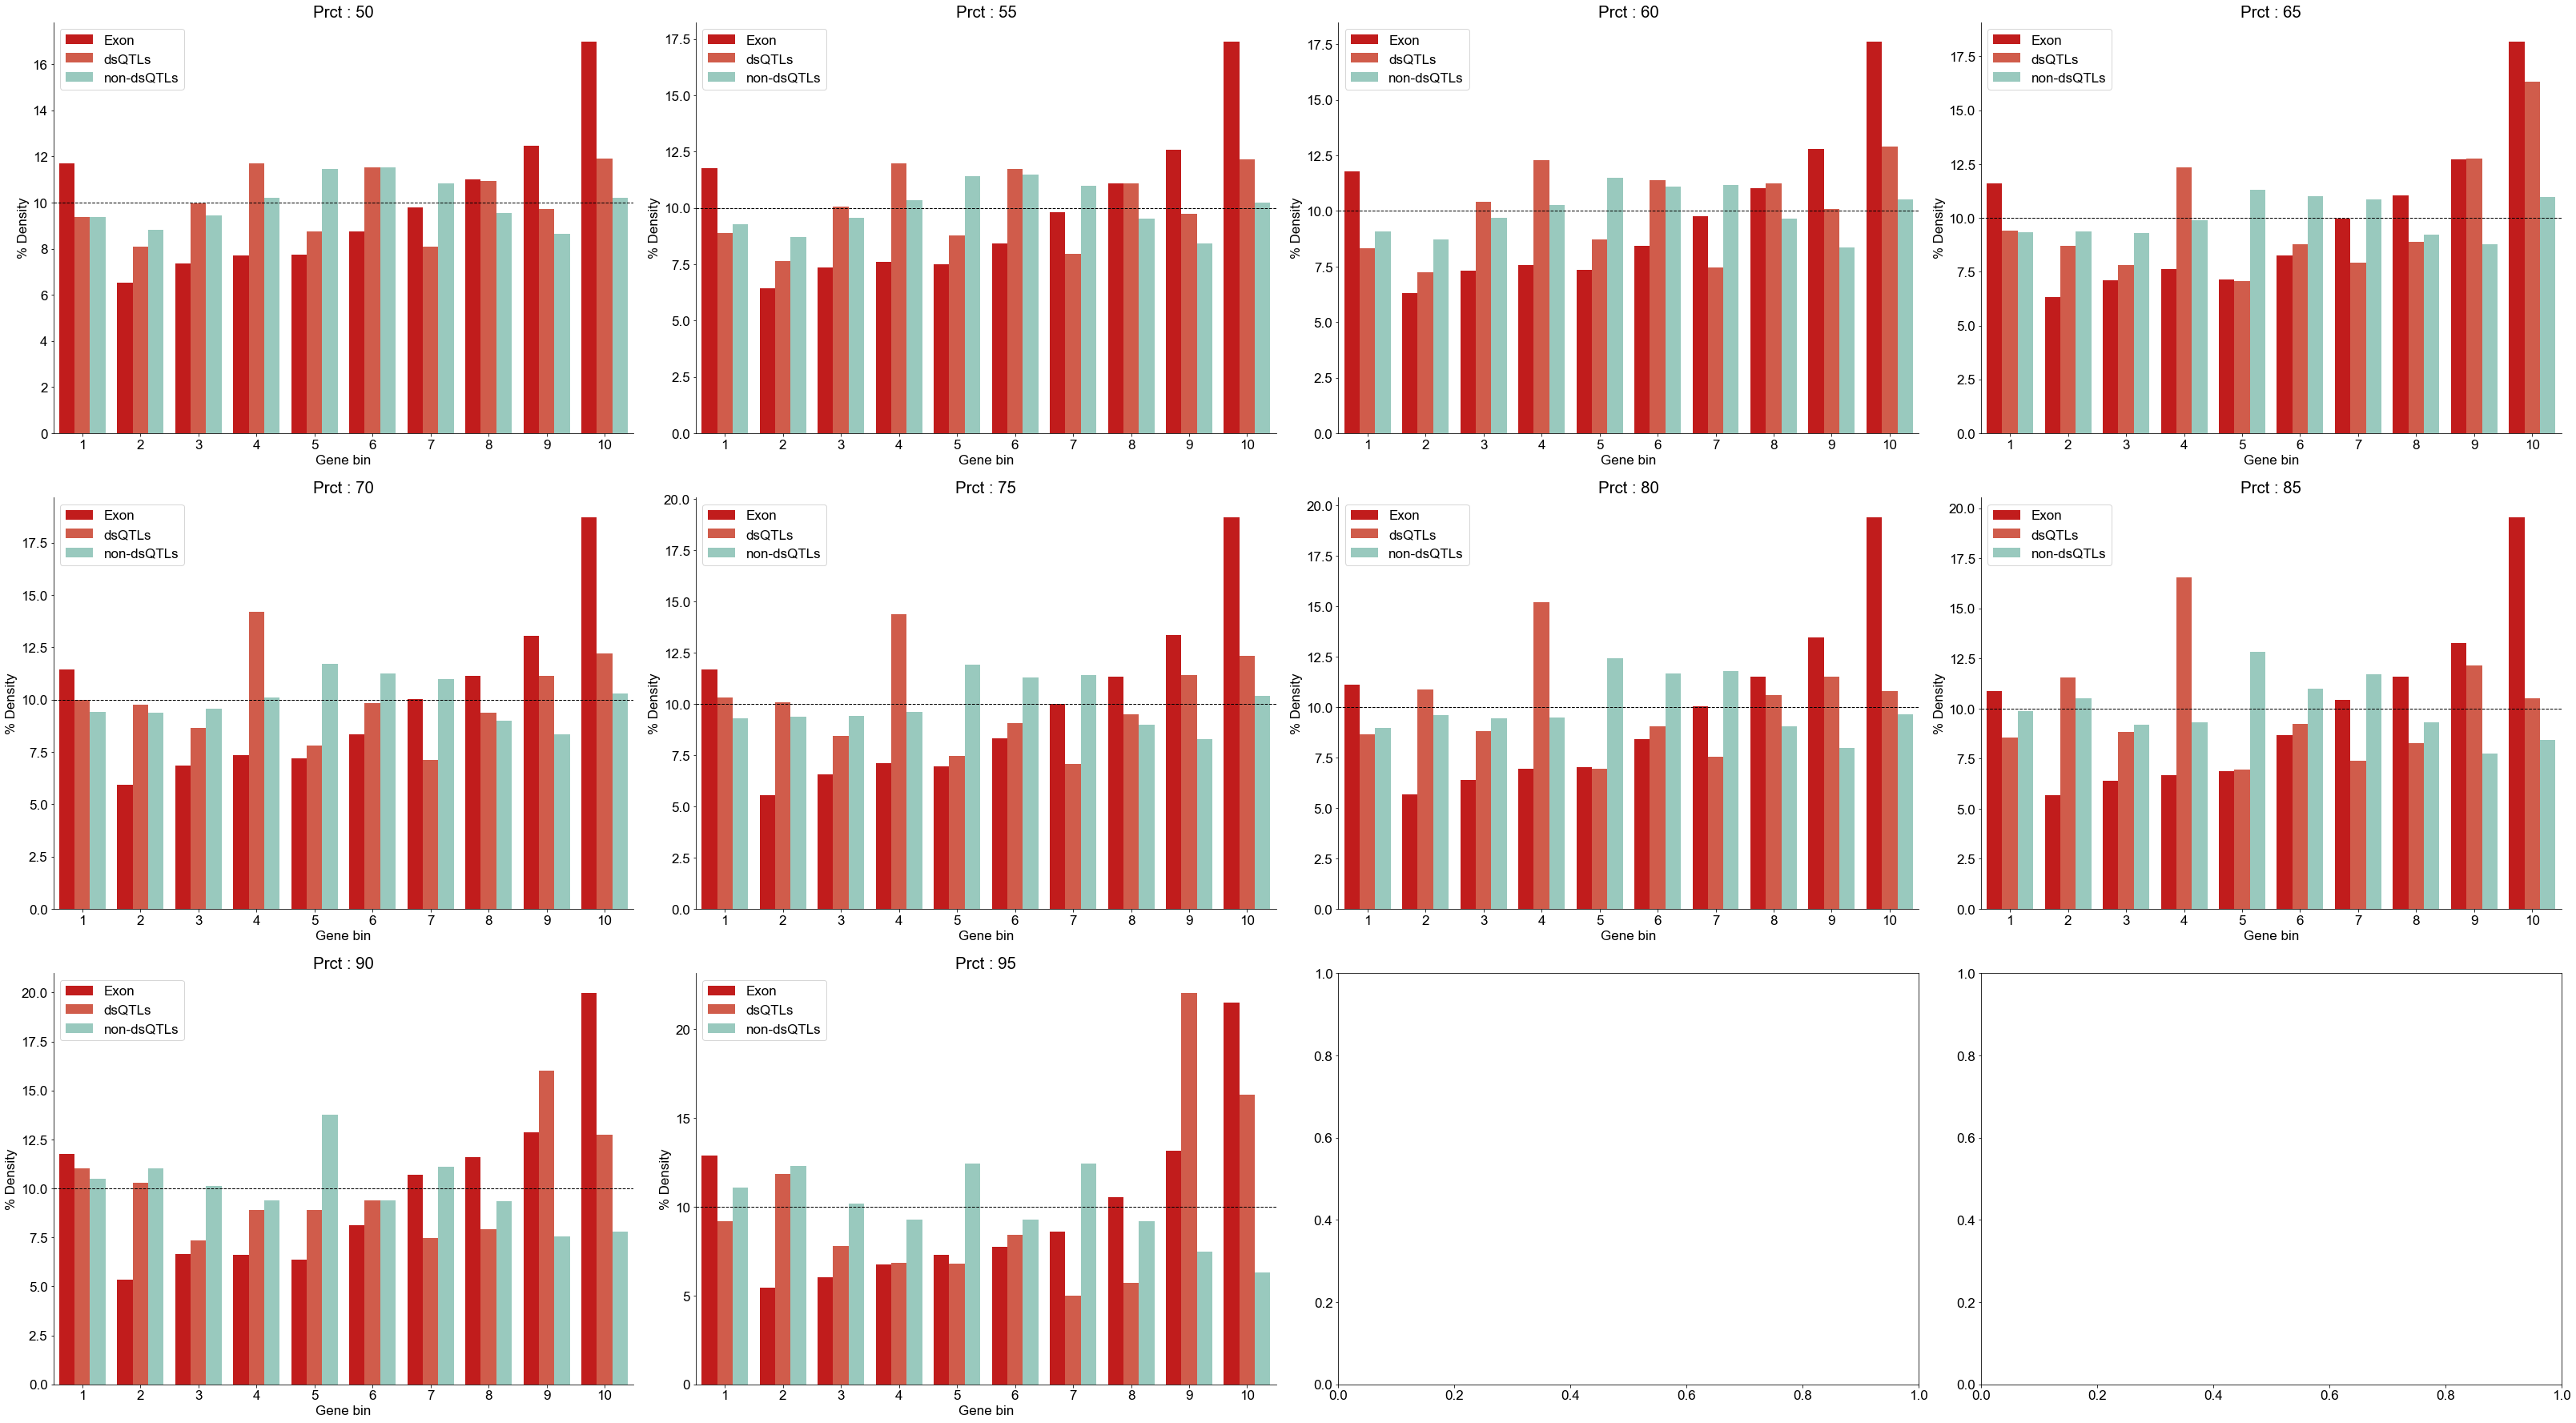

In [78]:
nb_bin = 10
palette = ['#DC0000', '#E64B35', '#91D1C2']



exons_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location'])
exons_df['Type'] = 'Exon'
sqtl_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location'])


concat_df_distribution_ratios = pd.concat([exons_df, sqtl_df])


f, ax = plt.subplots(ncols=4, nrows=3, figsize=(45, 25))

print(ax)

concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)

i = 0
j = 0
counter = 0
for p in list(concat_df_distribution_ratios.Prct.unique())[1:-1]:
    print(p)

    data = concat_df_distribution_ratios.loc[
        (concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & 
        (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & (concat_df_distribution_ratios['Prct'] == p)
    ]
    data['Type'] = data['Type'].replace({False : 'non-dsQTLs', True : 'dsQTLs'})

    plt.rcParams.update({'font.size' : 17})
    sns.barplot(data=data, x='Bin_num', y='value', hue='Type', palette=palette, ax=ax[i][j])
    ax[i][j].axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
    ax[i][j].set_xlabel('Gene bin')
    ax[i][j].set_ylabel('% Density')
    ax[i][j].legend(ncol=1)
    ax[i][j].spines['top'].set_linewidth(0)
    ax[i][j].spines['right'].set_linewidth(0)
    ax[i][j].set_title('Prct : {}'.format(p))
    
    counter += 1
    j += 1
    if counter % 4 == 0:
        j = 0
        i += 1 
plt.tight_layout()

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8c2e1db10>
50
55
60
65
70
75
80
85
90
95


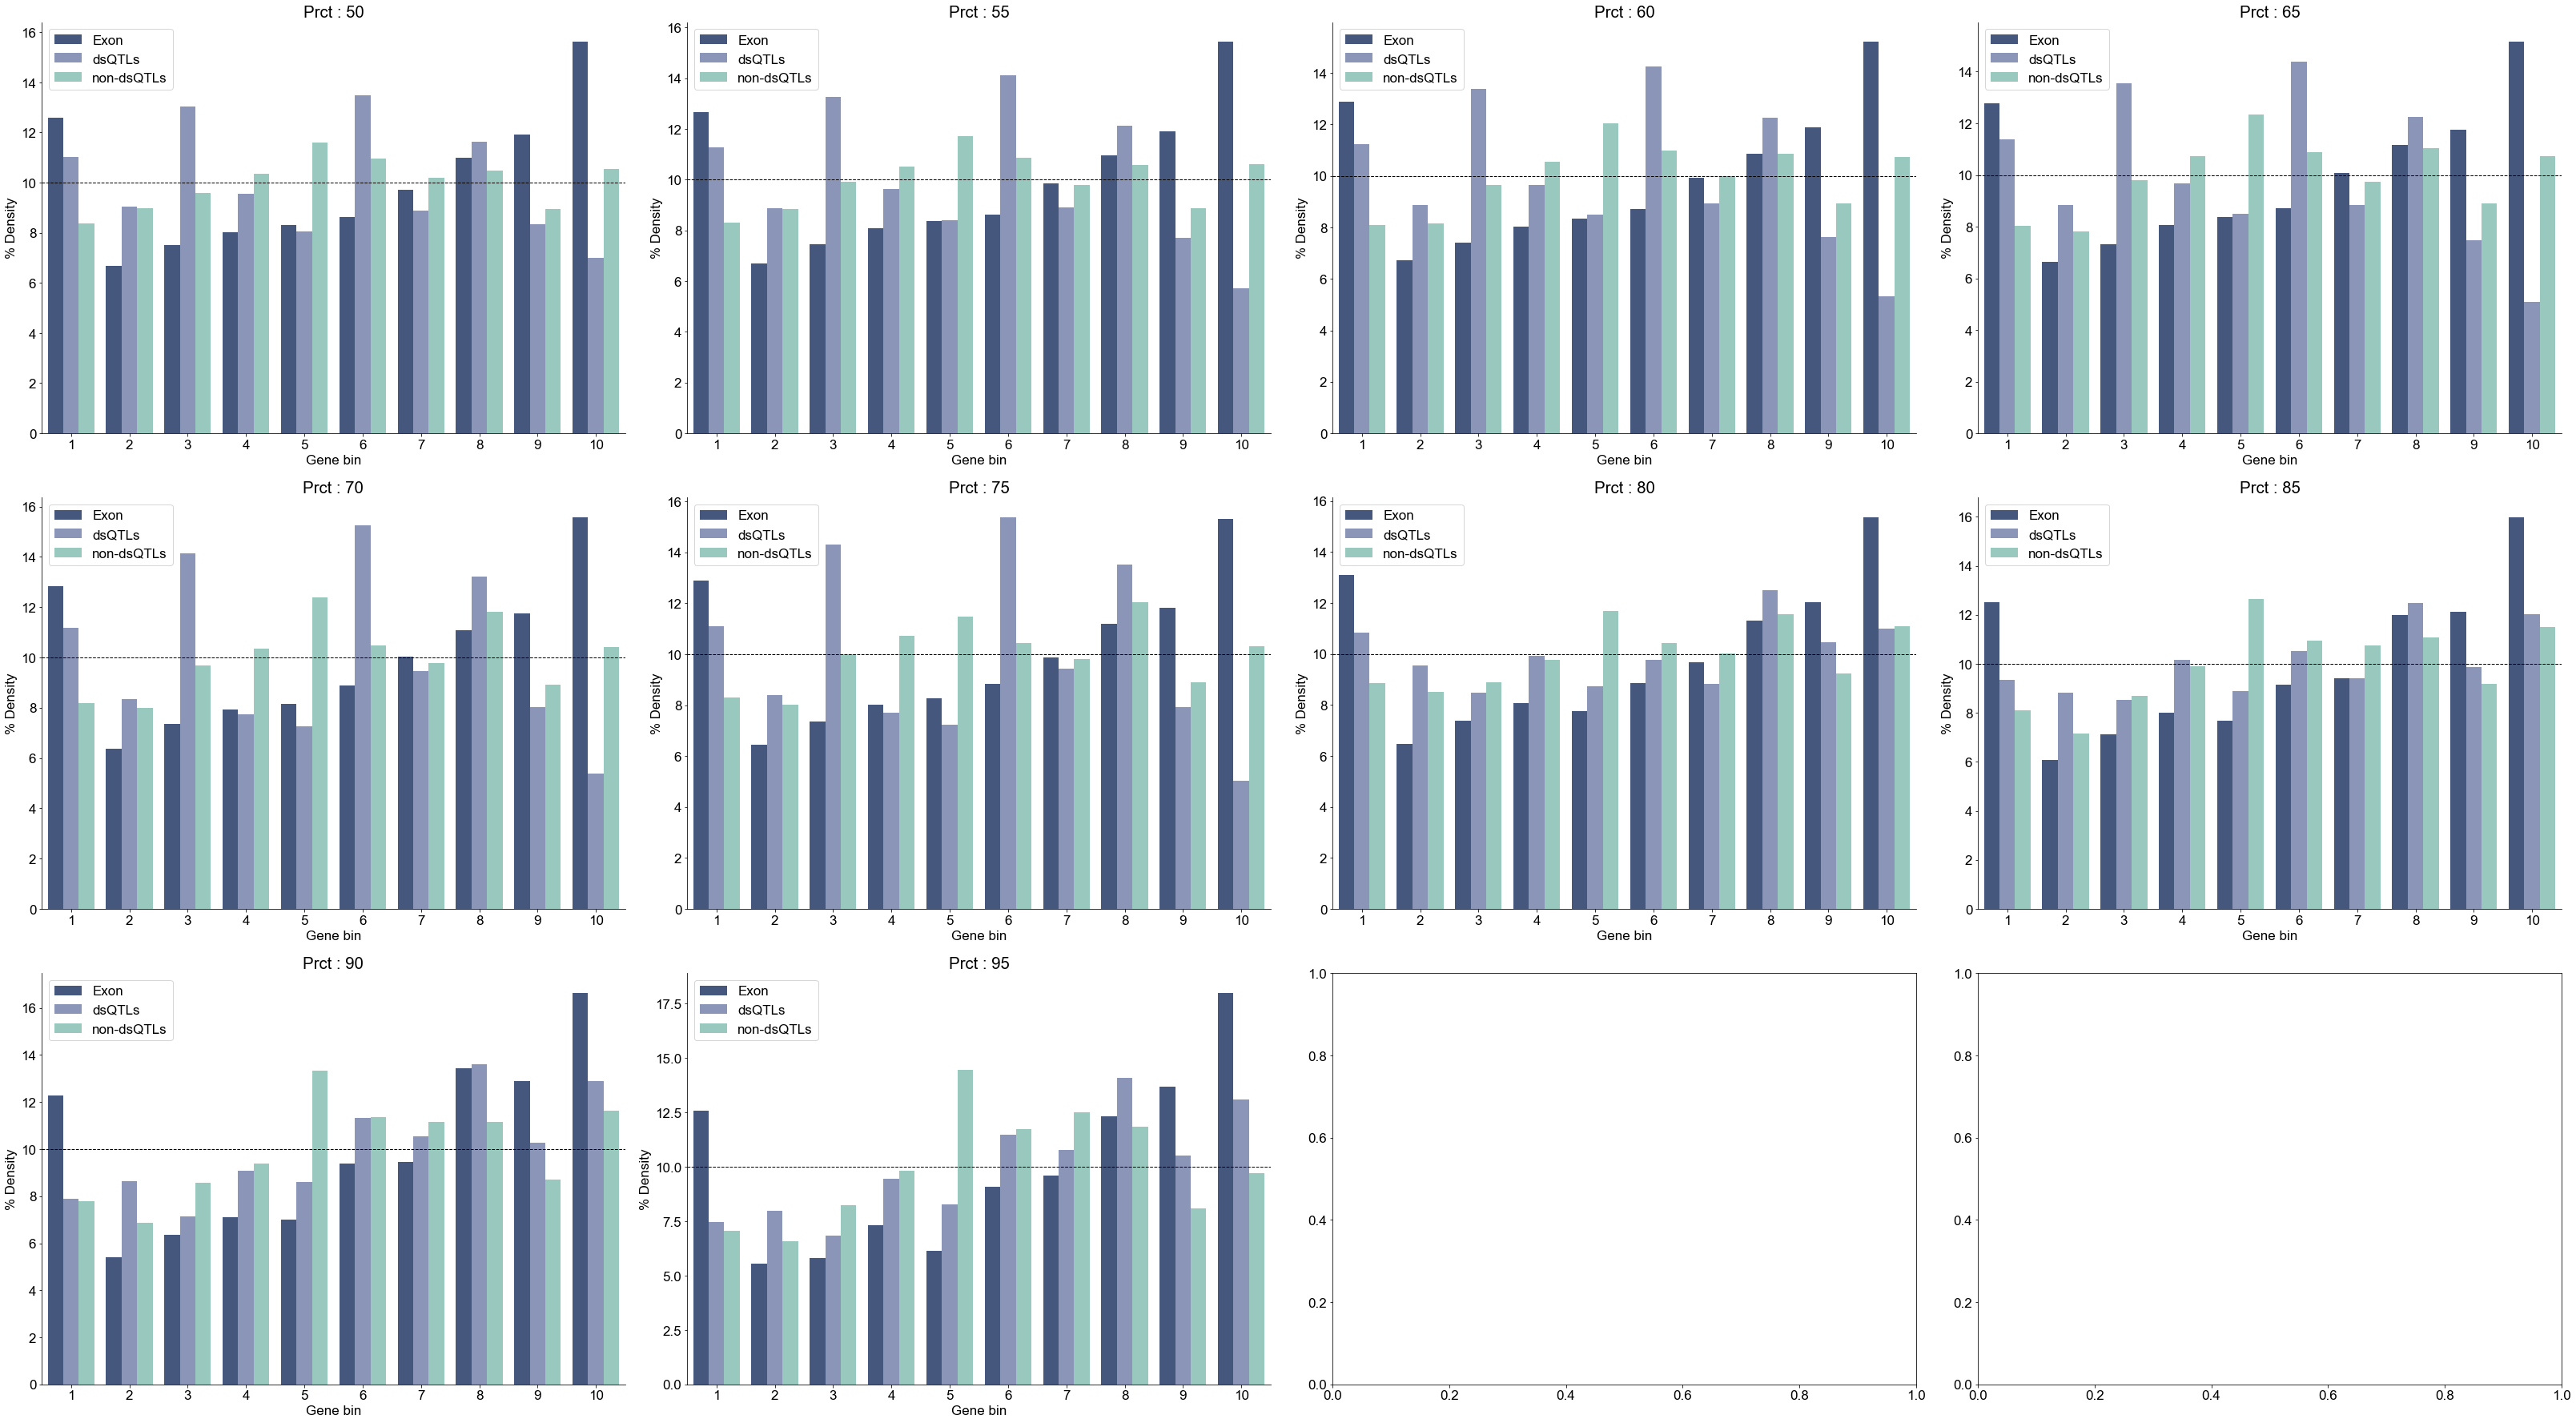

In [76]:
nb_bin = 10
palette = ['#3C5488', '#8491BF', '#91D1C2']



exons_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location'])
exons_df['Type'] = 'Exon'
sqtl_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location'])


concat_df_distribution_ratios = pd.concat([exons_df, sqtl_df])


f, ax = plt.subplots(ncols=4, nrows=3, figsize=(45, 25))

print(ax)

concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)

i = 0
j = 0
counter = 0
for p in list(concat_df_distribution_ratios.Prct.unique())[1:-1]:
    print(p)

    data = concat_df_distribution_ratios.loc[
        (concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & 
        (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & (concat_df_distribution_ratios['Prct'] == p)
    ]
    data['Type'] = data['Type'].replace({False : 'non-dsQTLs', True : 'dsQTLs'})

    plt.rcParams.update({'font.size' : 17})
    sns.barplot(data=data, x='Bin_num', y='value', hue='Type', palette=palette, ax=ax[i][j])
    ax[i][j].axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
    ax[i][j].set_xlabel('Gene bin')
    ax[i][j].set_ylabel('% Density')
    ax[i][j].legend(ncol=1)
    ax[i][j].spines['top'].set_linewidth(0)
    ax[i][j].spines['right'].set_linewidth(0)
    ax[i][j].set_title('Prct : {}'.format(p))
    
    counter += 1
    j += 1
    if counter % 4 == 0:
        j = 0
        i += 1 
plt.tight_layout()

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8c1839490>
60
70
80
90


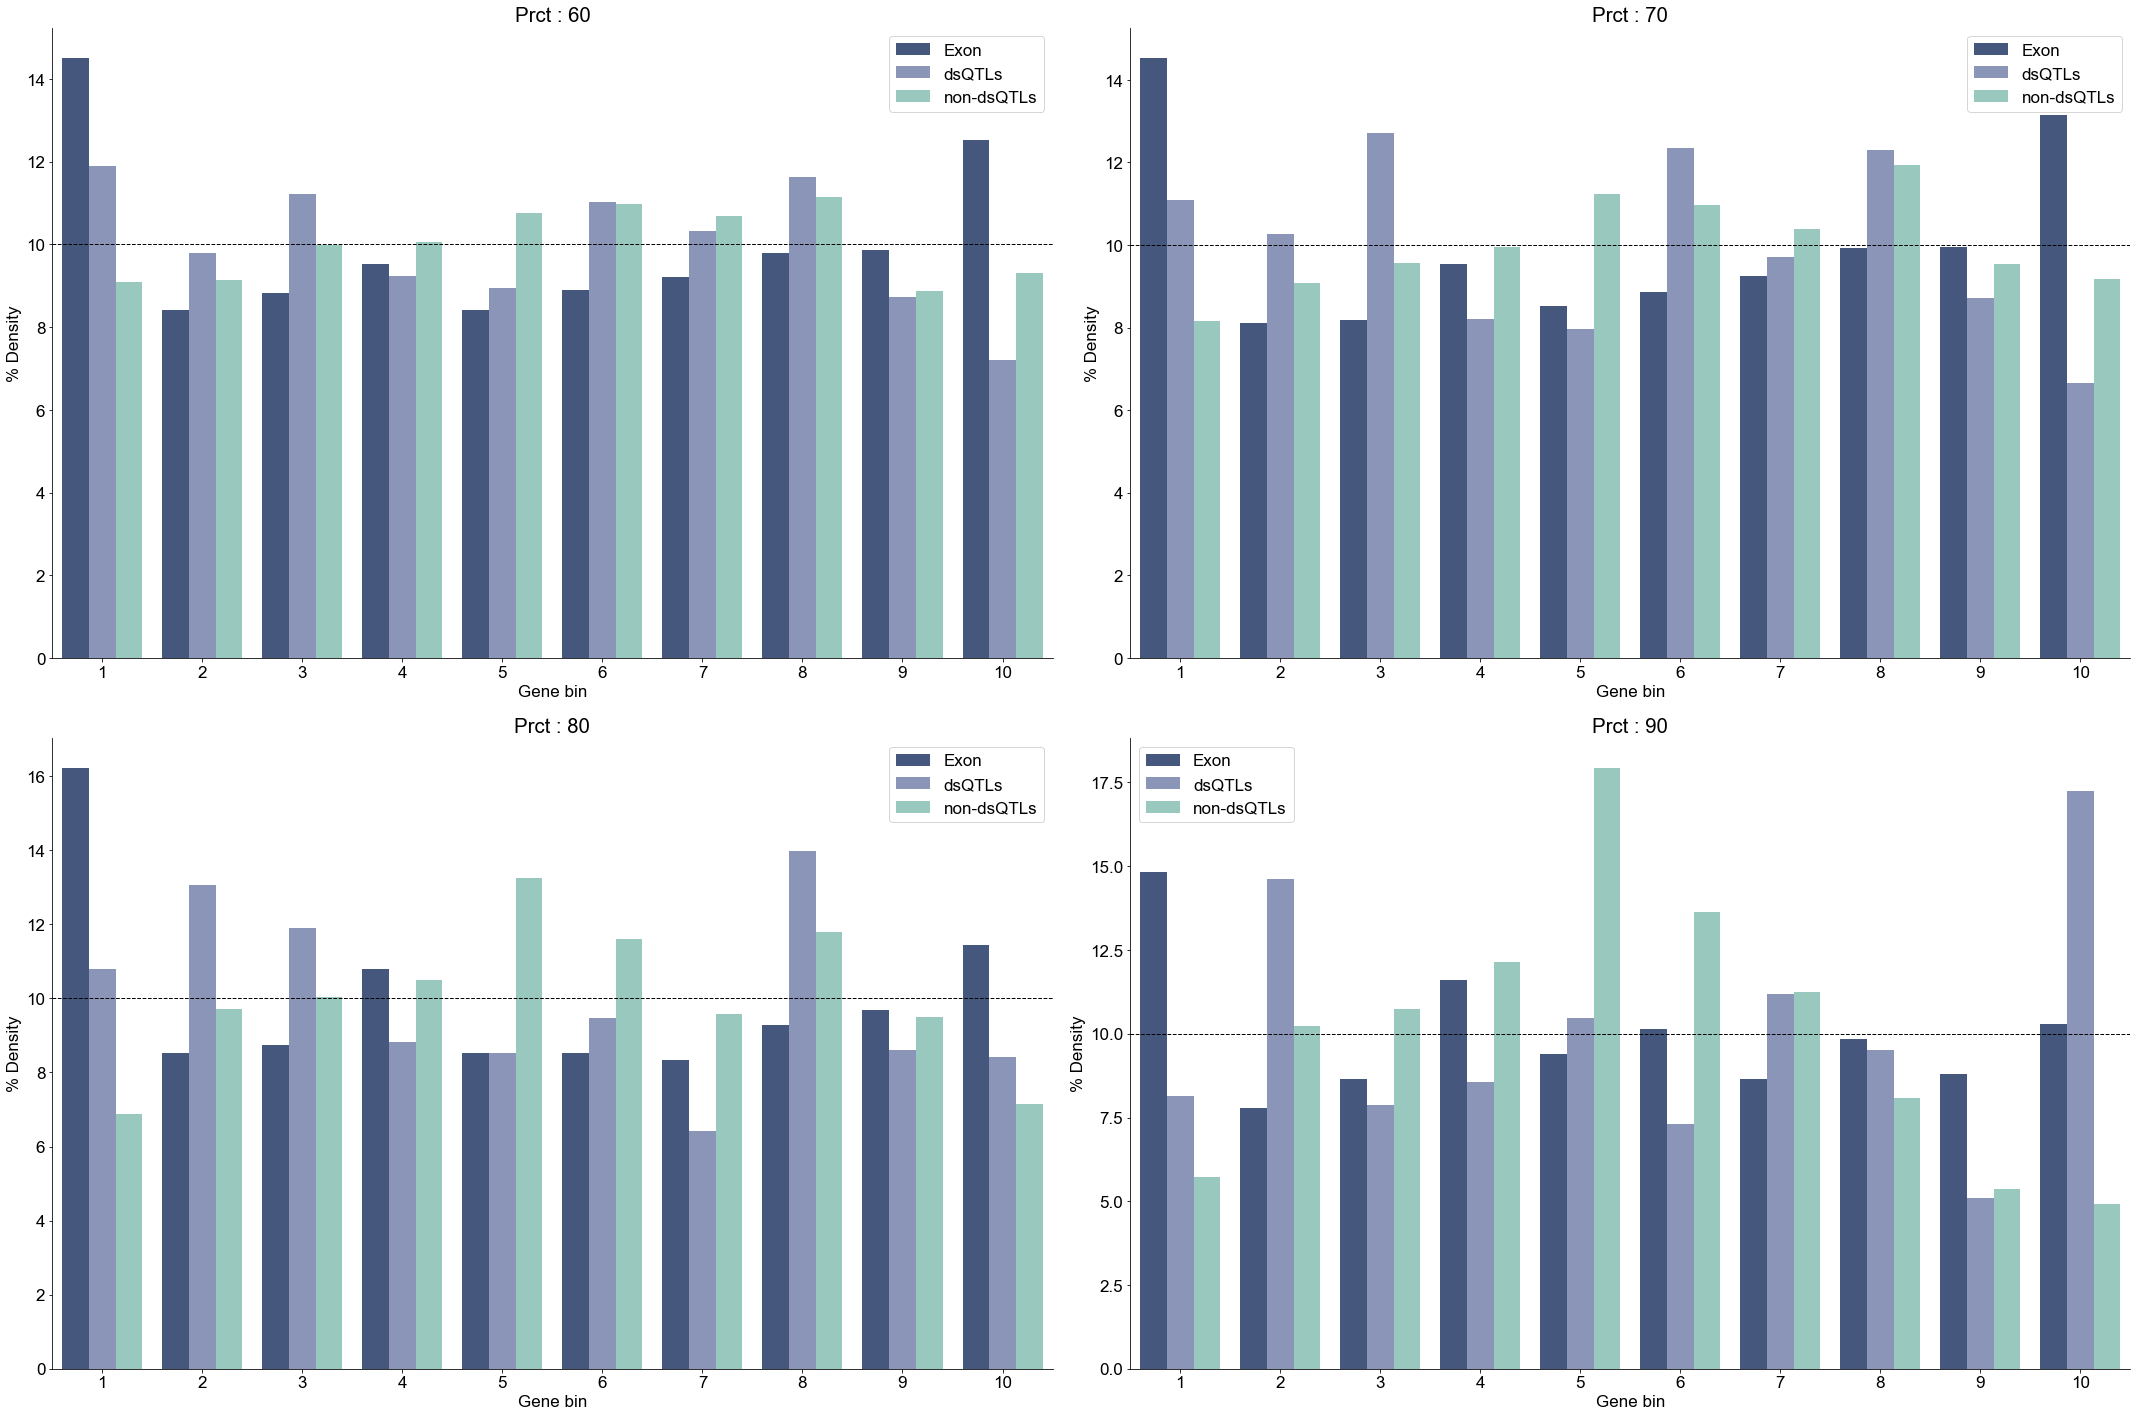

In [89]:
nb_bin = 10
palette = ['#3C5488', '#8491BF', '#91D1C2']



exons_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_test'])
exons_df['Type'] = 'Exon'
sqtl_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location_test'])


concat_df_distribution_ratios = pd.concat([exons_df, sqtl_df])


f, ax = plt.subplots(ncols=2, nrows=2, figsize=(30, 20))

print(ax)

concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)

concat_df_distribution_ratios.Prct.unique()

i = 0
j = 0
counter = 0
for p in list(concat_df_distribution_ratios.Prct.unique()):
    print(p)

    data = concat_df_distribution_ratios.loc[
        (concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & 
        (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & (concat_df_distribution_ratios['Prct'] == p)
    ]
    data['Type'] = data['Type'].replace({False : 'non-dsQTLs', True : 'dsQTLs'})

    plt.rcParams.update({'font.size' : 17})
    sns.barplot(data=data, x='Bin_num', y='value', hue='Type', palette=palette, ax=ax[i][j])
    ax[i][j].axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
    ax[i][j].set_xlabel('Gene bin')
    ax[i][j].set_ylabel('% Density')
    ax[i][j].legend(ncol=1)
    ax[i][j].spines['top'].set_linewidth(0)
    ax[i][j].spines['right'].set_linewidth(0)
    ax[i][j].set_title('Prct : {}'.format(p))
    
    counter += 1
    j += 1
    if counter % 2 == 0:
        j = 0
        i += 1 
plt.tight_layout()

In [96]:
exons_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_test'])
exons_df['Type'] = 'Exon'
sqtl_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location_test'])

concat_df_distribution_ratios = pd.concat([exons_df, sqtl_df])
concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Total/Ratio'] == 'Total') & (concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Prct'] == 0.9)].sort_values(by=['Type', 'Bin_num'])


,Prct,Total/Ratio,Cutoff,Nb_bin,Up/Down,Bin_num,value,Type
14,0.9,Total,0.52,10,up,1,2370.0,False
30,0.9,Total,0.52,10,up,2,4240.0,False
46,0.9,Total,0.52,10,up,3,4450.0,False
62,0.9,Total,0.52,10,up,4,5030.0,False
78,0.9,Total,0.52,10,up,5,7425.0,False
94,0.9,Total,0.52,10,up,6,5645.0,False
110,0.9,Total,0.52,10,up,7,4663.0,False
126,0.9,Total,0.52,10,up,8,3348.0,False
142,0.9,Total,0.52,10,up,9,2221.0,False
158,0.9,Total,0.52,10,up,10,2040.0,False


In [106]:
exons_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_test2'])
exons_df['Type'] = 'Exon'
sqtl_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location_test2'])

concat_df_distribution_ratios = pd.concat([exons_df, sqtl_df])
concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Total/Ratio'] == 'Total') & (concat_df_distribution_ratios['Up/Down'] == 'down')].sort_values(by=['Type', 'Bin_num'])


,Prct,Total/Ratio,Cutoff,Nb_bin,Up/Down,Bin_num,value,Type
42,0.6,Total,0.5,10,down,1,11213.0,False
46,0.6,Total,0.5,10,down,2,13913.0,False
50,0.6,Total,0.5,10,down,3,15571.0,False
54,0.6,Total,0.5,10,down,4,13381.0,False
58,0.6,Total,0.5,10,down,5,17997.0,False
62,0.6,Total,0.5,10,down,6,15646.0,False
66,0.6,Total,0.5,10,down,7,12956.0,False
70,0.6,Total,0.5,10,down,8,16025.0,False
74,0.6,Total,0.5,10,down,9,17806.0,False
78,0.6,Total,0.5,10,down,10,20913.0,False


In [107]:
exons_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_test2'])
exons_df['Type'] = 'Exon'
sqtl_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location_test2'])

concat_df_distribution_ratios = pd.concat([exons_df, sqtl_df])
concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Total/Ratio'] == 'Total') & (concat_df_distribution_ratios['Up/Down'] == 'down')].sort_values(by=['Type', 'Bin_num'])


,Prct,Total/Ratio,Cutoff,Nb_bin,Up/Down,Bin_num,value,Type
42,0.6,Total,0.5,10,down,1,84940.0,False
46,0.6,Total,0.5,10,down,2,89069.0,False
50,0.6,Total,0.5,10,down,3,79729.0,False
54,0.6,Total,0.5,10,down,4,78699.0,False
58,0.6,Total,0.5,10,down,5,112620.0,False
62,0.6,Total,0.5,10,down,6,90041.0,False
66,0.6,Total,0.5,10,down,7,97219.0,False
70,0.6,Total,0.5,10,down,8,75279.0,False
74,0.6,Total,0.5,10,down,9,62839.0,False
78,0.6,Total,0.5,10,down,10,66481.0,False


In [100]:
exons_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location'])
exons_df['Type'] = 'Exon'
sqtl_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location'])

concat_df_distribution_ratios = pd.concat([exons_df, sqtl_df])
concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Total/Ratio'] == 'Total') & (concat_df_distribution_ratios['Up/Down'] == 'up') 
                                  & (concat_df_distribution_ratios['Prct'] == 0.9) & (concat_df_distribution_ratios['Nb_bin'] == 10)
                                 ].sort_values(by=['Type', 'Bin_num'])


,Prct,Total/Ratio,Cutoff,Nb_bin,Up/Down,Bin_num,value,Type
676,0.9,Total,0.52,10,up,1,44686.0,False
716,0.9,Total,0.52,10,up,2,39341.0,False
756,0.9,Total,0.52,10,up,3,49111.0,False
796,0.9,Total,0.52,10,up,4,53835.0,False
836,0.9,Total,0.52,10,up,5,76382.0,False
876,0.9,Total,0.52,10,up,6,65004.0,False
916,0.9,Total,0.52,10,up,7,63838.0,False
956,0.9,Total,0.52,10,up,8,63984.0,False
996,0.9,Total,0.52,10,up,9,49864.0,False
1036,0.9,Total,0.52,10,up,10,66586.0,False


50
55
60
65
70


IndexError: index 2 is out of bounds for axis 0 with size 2

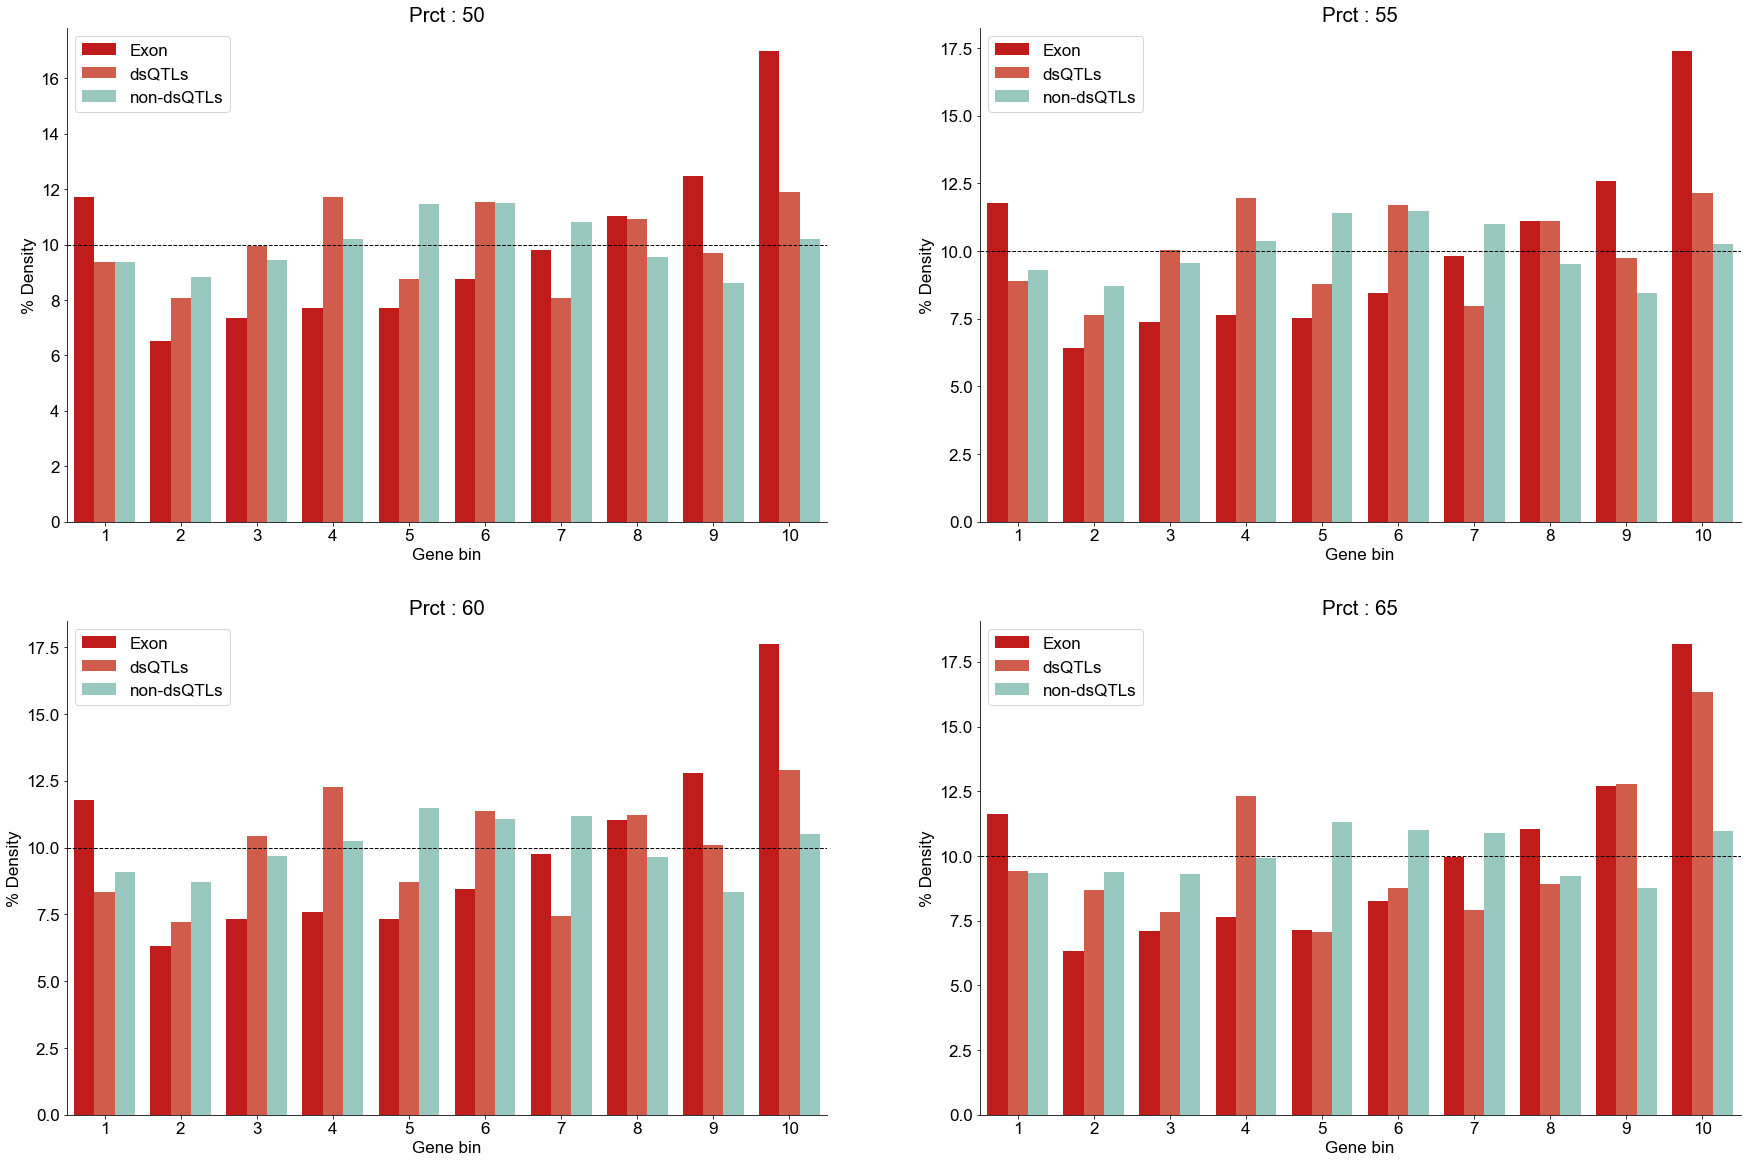

In [124]:
nb_bin = 10
palette = ['#DC0000', '#E64B35', '#91D1C2']



exons_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location'])
exons_df['Type'] = 'Exon'
sqtl_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location'])


concat_df_distribution_ratios = pd.concat([exons_df, sqtl_df])


f, ax = plt.subplots(ncols=2, nrows=2, figsize=(30, 20))

concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)



concat_df_distribution_ratios.Prct.unique()

i = 0
j = 0
counter = 0
for p in list(concat_df_distribution_ratios.Prct.unique())[1:-1]:
    print(p)

    data = concat_df_distribution_ratios.loc[
        (concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & 
        (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & (concat_df_distribution_ratios['Prct'] == p)
    ]
    data['Type'] = data['Type'].replace({False : 'non-dsQTLs', True : 'dsQTLs'})

    plt.rcParams.update({'font.size' : 17})
    sns.barplot(data=data, x='Bin_num', y='value', hue='Type', palette=palette, ax=ax[i][j])
    ax[i][j].axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
    ax[i][j].set_xlabel('Gene bin')
    ax[i][j].set_ylabel('% Density')
    ax[i][j].legend(ncol=1)
    ax[i][j].spines['top'].set_linewidth(0)
    ax[i][j].spines['right'].set_linewidth(0)
    ax[i][j].set_title('Prct : {}'.format(p))
    
    counter += 1
    j += 1
    if counter % 2 == 0:
        j = 0
        i += 1 
plt.tight_layout()

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8be8dd0d0>
60
70
80
90


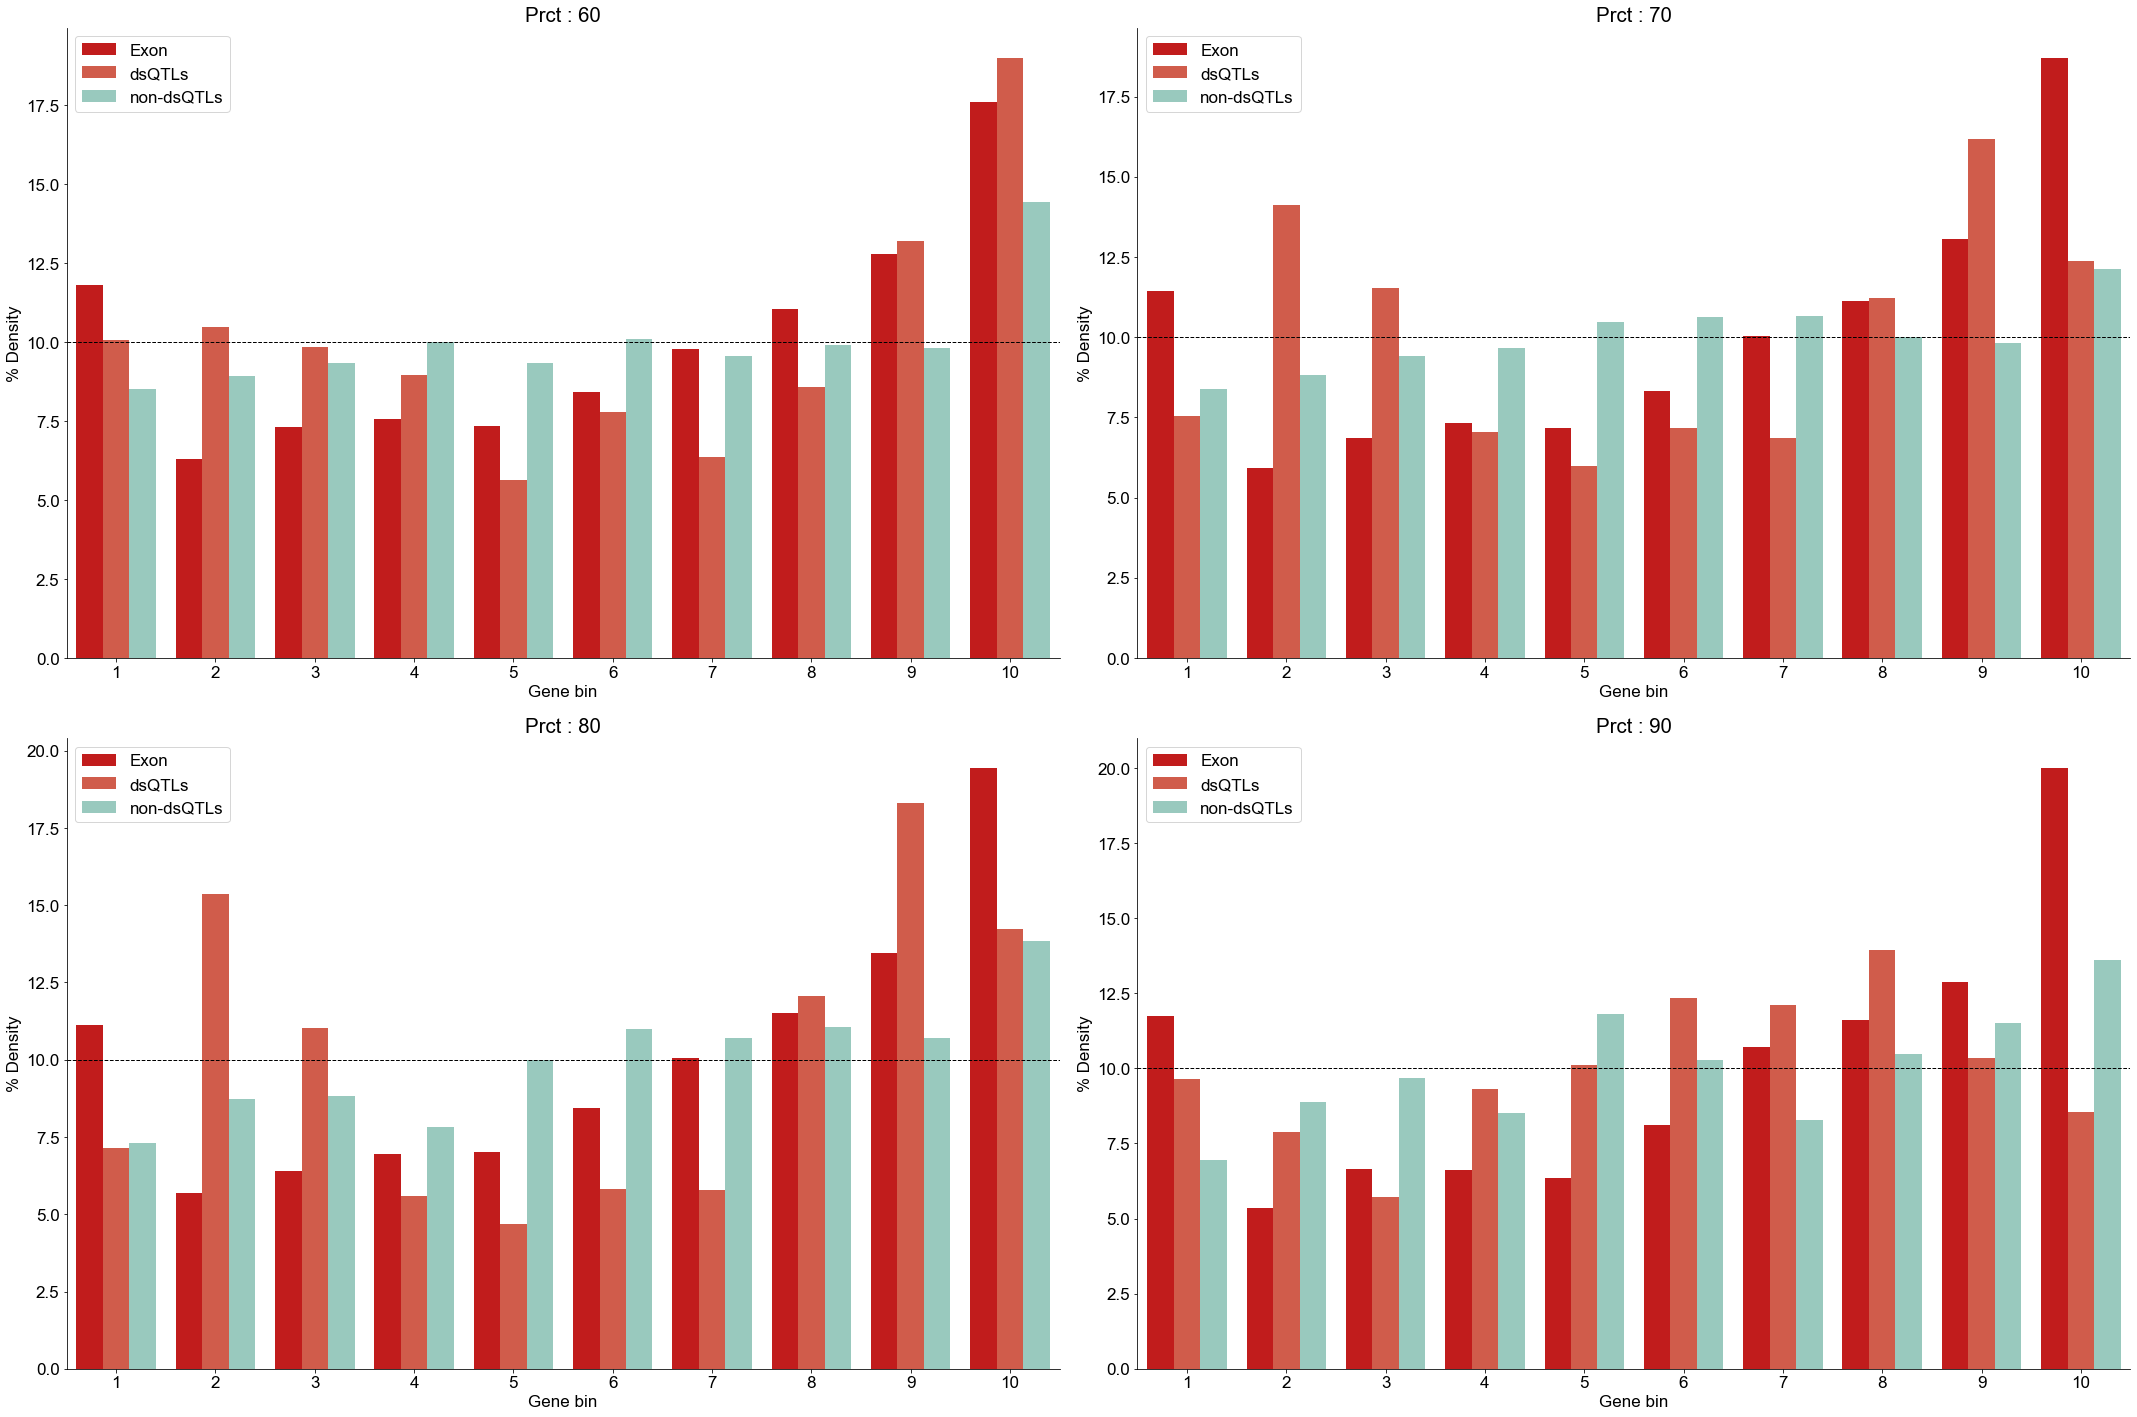

In [90]:
nb_bin = 10
palette = ['#DC0000', '#E64B35', '#91D1C2']



exons_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_test'])
exons_df['Type'] = 'Exon'
sqtl_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location_test'])


concat_df_distribution_ratios = pd.concat([exons_df, sqtl_df])


f, ax = plt.subplots(ncols=2, nrows=2, figsize=(30, 20))

concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)



concat_df_distribution_ratios.Prct.unique()

i = 0
j = 0
counter = 0
for p in list(concat_df_distribution_ratios.Prct.unique()):
    print(p)

    data = concat_df_distribution_ratios.loc[
        (concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & 
        (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & (concat_df_distribution_ratios['Prct'] == p)
    ]
    data['Type'] = data['Type'].replace({False : 'non-dsQTLs', True : 'dsQTLs'})

    plt.rcParams.update({'font.size' : 17})
    sns.barplot(data=data, x='Bin_num', y='value', hue='Type', palette=palette, ax=ax[i][j])
    ax[i][j].axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
    ax[i][j].set_xlabel('Gene bin')
    ax[i][j].set_ylabel('% Density')
    ax[i][j].legend(ncol=1)
    ax[i][j].spines['top'].set_linewidth(0)
    ax[i][j].spines['right'].set_linewidth(0)
    ax[i][j].set_title('Prct : {}'.format(p))
    
    counter += 1
    j += 1
    if counter % 2 == 0:
        j = 0
        i += 1 
plt.tight_layout()

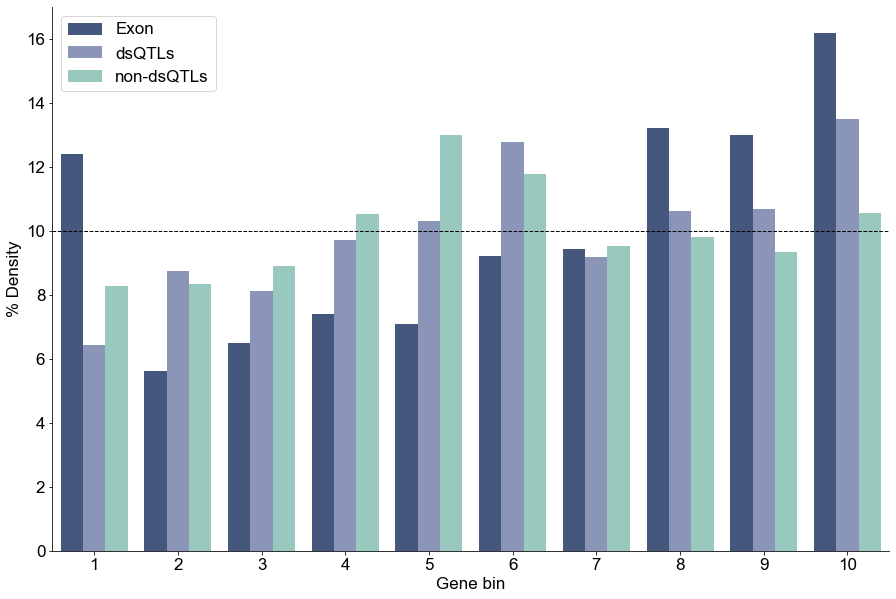

In [113]:
nb_bin = 10
cutoff = 0.5
palette = ['#3C5488', '#8491BF', '#91D1C2']


exons_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_test2'])
exons_df['Type'] = 'Exon'
sqtl_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location_test2'])

concat_df_distribution_ratios = pd.concat([exons_df, sqtl_df])

concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[
    (concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & 
    (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & (concat_df_distribution_ratios['Cutoff'] == 0.5)
]
concat_df_distribution_ratios['Type'] = concat_df_distribution_ratios['Type'].replace({False : 'non-dsQTLs', True : 'dsQTLs'})


plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Type', palette=palette)
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(ncol=1)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
# plt.title('Cutoff : {}'.format(cutoff))

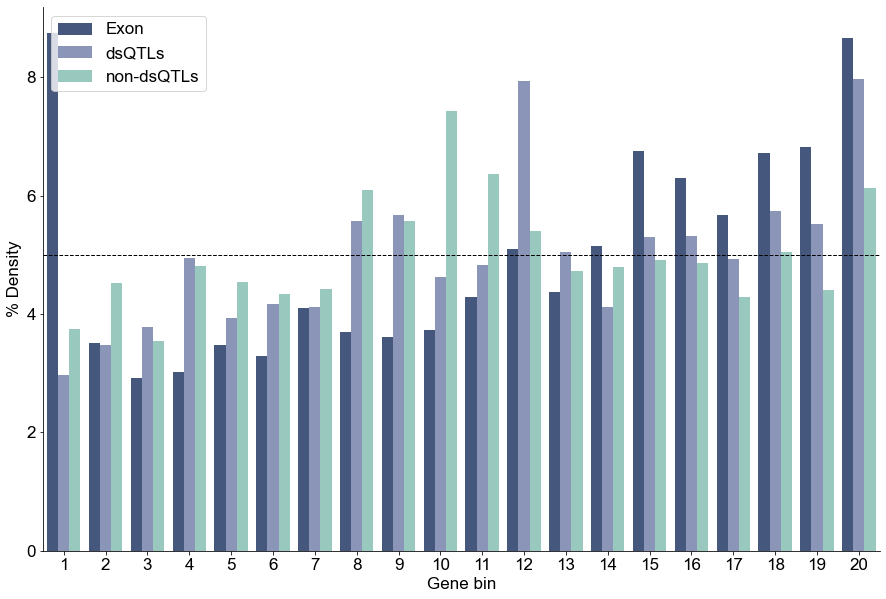

In [216]:
nb_bin = 20
cutoff = 0.5
palette = ['#3C5488', '#8491BF', '#91D1C2']


exons_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_cutoff'])
exons_df['Type'] = 'Exon'
sqtl_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location_cutoff'])

concat_df_distribution_ratios = pd.concat([exons_df, sqtl_df])

concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[
    (concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & 
    (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & (concat_df_distribution_ratios['Cutoff'] == 0.5)
]
concat_df_distribution_ratios['Type'] = concat_df_distribution_ratios['Type'].replace({False : 'non-dsQTLs', True : 'dsQTLs'})


plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Type', palette=palette)
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(ncol=1)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
# plt.title('Cutoff : {}'.format(cutoff))

Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=0.0, pvalue=1.0)
[8.74966244 3.51066703 2.91655415 3.02457467 3.4836619  3.29462598
 4.10477991 3.69970294 3.61868755 3.72670807 4.29381583 5.10396975
 4.37483122 5.15798002 6.75128274 6.29219552 5.6710775  6.72427761
 6.83229814 8.66864704] [2.96424663 3.47500912 3.77599416 4.95257205 3.94016782 4.16818679
 4.11346224 5.58190441 5.673112   4.63334549 4.83400219 7.9350602
 5.0529004  4.11346224 5.29916089 5.32652317 4.92520978 5.73695731
 5.52717986 7.97154323]
SpearmanrResult(correlation=0.3685596349395199, pvalue=0.10982041030602327)
SpearmanrResult(correlation=0.09624060150375939, pvalue=0.6864870716570238)
SpearmanrResult(correlation=0.6092516414306349, pvalue=0.004351779854156044)
MannwhitneyuResult(statistic=182.0, pvalue=0.31796435605619017)
MannwhitneyuResult(statistic=171.0, pvalue=0.22037494179917133)
MannwhitneyuResult(statistic=200.0, pvalue=0.4946041993187206)
  

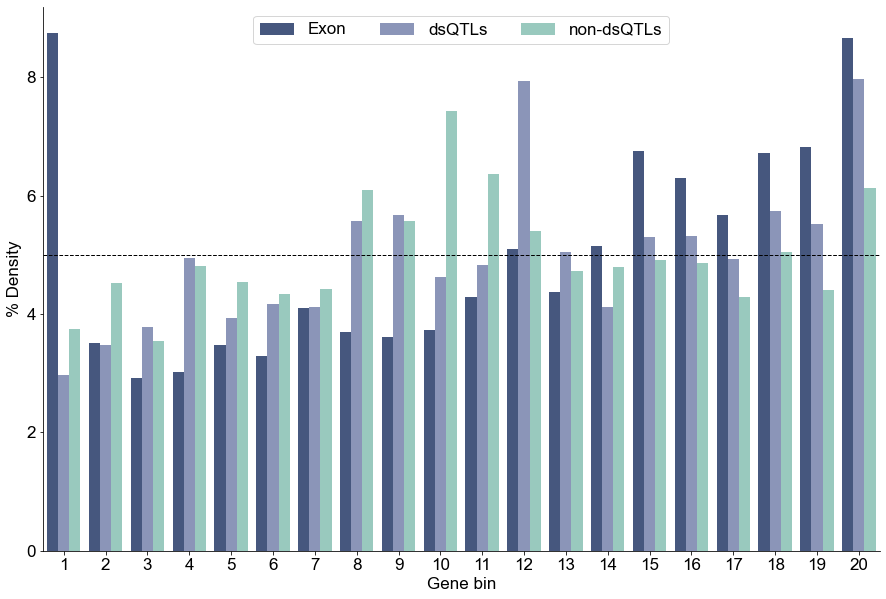

In [199]:
import scipy
nb_bin = 20
cutoff = 0.5
palette = ['#3C5488', '#8491BF', '#91D1C2']


exons_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_cutoff'])
exons_df['Type'] = 'Exon'
sqtl_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location_cutoff'])

concat_df_distribution_ratios = pd.concat([exons_df, sqtl_df])

concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)

v = concat_df_distribution_ratios.loc[
    (concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & 
    (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & (concat_df_distribution_ratios['Cutoff'] == 0.5)
][['Type', 'value']].pivot(columns='Type', values='value')

# v
print(scipy.stats.ttest_ind(v.Exon.dropna().values, v[True].dropna().values))
print(scipy.stats.ttest_ind(v.Exon.dropna().values, v[False].dropna().values))
print(scipy.stats.ttest_ind(v[False].dropna().values, v[True].dropna().values))

k = 0
print(v.Exon.dropna().values[k:], v[True].dropna().values[k:])
print(scipy.stats.spearmanr(v.Exon.dropna().values[k:], v[True].dropna().values[k:]))
print(scipy.stats.spearmanr(v.Exon.dropna().values[k:], v[False].dropna().values[k:]))
print(scipy.stats.spearmanr(v[False].dropna().values[k:], v[True].dropna().values[k:]))

print(scipy.stats.mannwhitneyu(v.Exon.dropna().values[k:], v[True].dropna().values[k:]))
print(scipy.stats.mannwhitneyu(v.Exon.dropna().values[k:], v[False].dropna().values[k:]))
print(scipy.stats.mannwhitneyu(v[False].dropna().values[k:], v[True].dropna().values[k:]))


concat_df_distribution_ratios = concat_df_distribution_ratios.loc[
    (concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & 
    (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & (concat_df_distribution_ratios['Cutoff'] == 0.5)
]
concat_df_distribution_ratios['Type'] = concat_df_distribution_ratios['Type'].replace({False : 'non-dsQTLs', True : 'dsQTLs'})
print(concat_df_distribution_ratios.sort_values(by=['Type', 'Bin_num']))

plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Type', palette=palette)
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(ncol=3, loc='upper center')
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
# plt.title('Cutoff : {}'.format(cutoff))

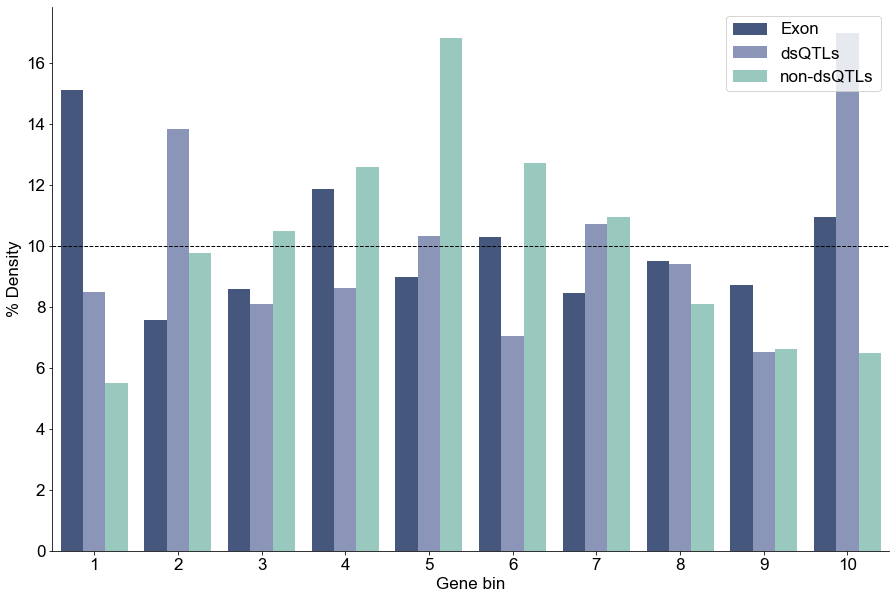

In [125]:
yaml = utils.load_config_file(config_file="../../clean/src/config_clean_clean.yaml")
yaml

nb_bin = 10
cutoff = 0.5
palette = ['#3C5488', '#8491BF', '#91D1C2']


exons_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_specific'])
exons_df['Type'] = 'Exon'
sqtl_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location_specific'])

concat_df_distribution_ratios = pd.concat([exons_df, sqtl_df])

# concat_df_distribution_ratios

concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[
    (concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & 
    (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & (concat_df_distribution_ratios['Cutoff'] == 0.5)
]
concat_df_distribution_ratios['Type'] = concat_df_distribution_ratios['Type'].replace({False : 'non-dsQTLs', True : 'dsQTLs'})


plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Type', palette=palette)
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(ncol=1)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
# plt.title('Cutoff : {}'.format(cutoff))

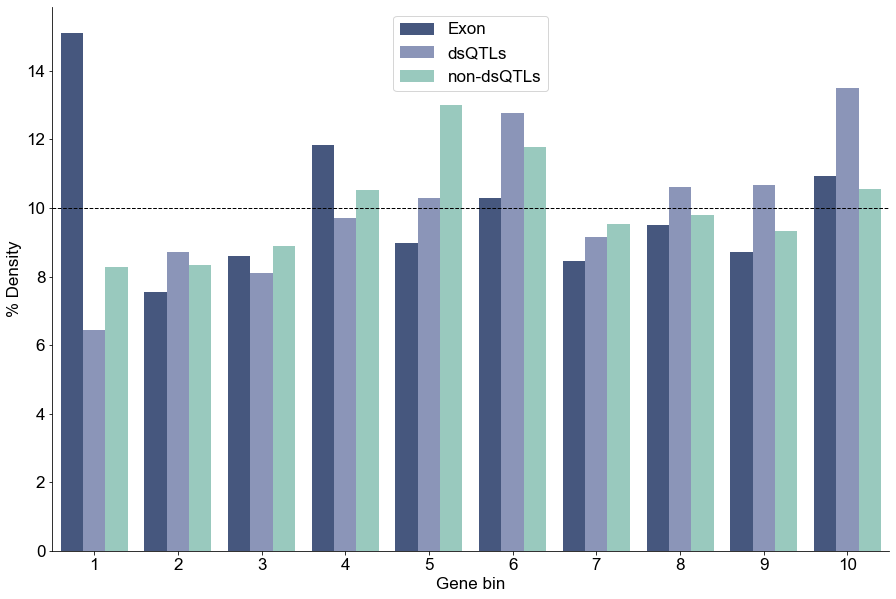

In [132]:
yaml = utils.load_config_file(config_file="../../clean/src/config_clean_clean.yaml")
yaml

nb_bin = 10
cutoff = 0.5
palette = ['#3C5488', '#8491BF', '#91D1C2']


exons_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_cutoff'])
exons_df['Type'] = 'Exon'
sqtl_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location_cutoff'])

concat_df_distribution_ratios = pd.concat([exons_df, sqtl_df])

# concat_df_distribution_ratios

concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[
    (concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & 
    (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & (concat_df_distribution_ratios['Cutoff'] == 0.5)
]
concat_df_distribution_ratios['Type'] = concat_df_distribution_ratios['Type'].replace({False : 'non-dsQTLs', True : 'dsQTLs'})


plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Type', palette=palette)
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(ncol=1)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
# plt.title('Cutoff : {}'.format(cutoff))

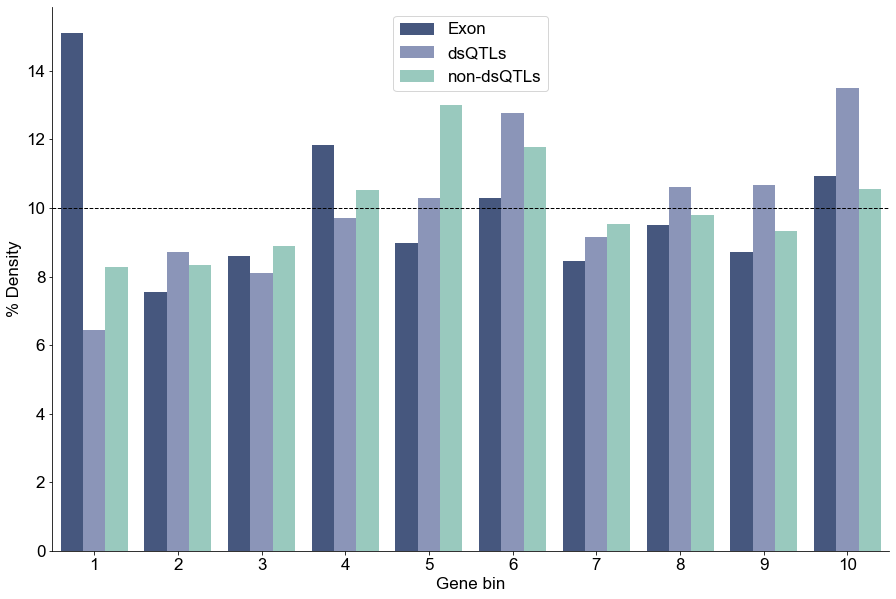

In [131]:
yaml = utils.load_config_file(config_file="../../clean/src/config_clean_clean.yaml")
yaml

nb_bin = 10
cutoff = 0.5
palette = ['#3C5488', '#8491BF', '#91D1C2']


exons_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_cutoff'])
exons_df['Type'] = 'Exon'
sqtl_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location_cutoff'])

concat_df_distribution_ratios = pd.concat([exons_df, sqtl_df])

# concat_df_distribution_ratios

concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[
    (concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & 
    (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & (concat_df_distribution_ratios['Cutoff'] == 0.5)
]
concat_df_distribution_ratios['Type'] = concat_df_distribution_ratios['Type'].replace({False : 'non-dsQTLs', True : 'dsQTLs'})


plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Type', palette=palette)
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(ncol=1)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
# plt.title('Cutoff : {}'.format(cutoff))

Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=-1.6085880024567315e-15, pvalue=0.9999999999999987)
Ttest_indResult(statistic=2.7991289374385765e-15, pvalue=0.9999999999999978)
[ 8.22015726  2.85918513  2.64474625  3.02597093  3.16893019  3.14510365
  3.35954253  3.24040982  3.50250179  3.31188944  3.52632833  4.90826781
  5.05122707  5.64689064  5.55158447  5.98046223  5.90898261  7.36240172
  8.05337146 11.5320467 ] [6.02050326 7.5862069  5.90866729 5.31220876 5.03261883 5.57315937
 6.71015843 6.65424045 6.16961789 3.76514445 4.67847158 4.6971109
 3.70922647 4.64119292 4.00745573 3.91425909 3.67194781 4.11929171
 4.19384902 3.63466915]
SpearmanrResult(correlation=-0.5954887218045113, pvalue=0.005601441030074218)
SpearmanrResult(correlation=-0.05263157894736842, pvalue=0.825581450455932)
SpearmanrResult(correlation=0.022556390977443608, pvalue=0.9247982163788796)
MannwhitneyuResult(statistic=159.0, pvalue=0.1366425600905376)
MannwhitneyuResult(statistic=166.0, pva

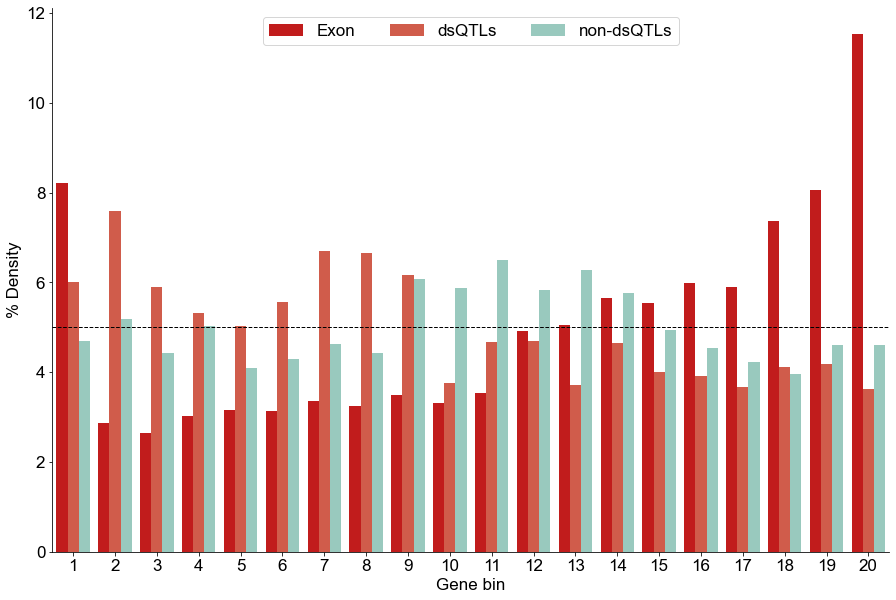

In [200]:
nb_bin = 20
cutoff = 0.5
palette = ['#DC0000', '#E64B35', '#91D1C2']


exons_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_cutoff'])
exons_df['Type'] = 'Exon'
sqtl_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location_cutoff'])

concat_df_distribution_ratios = pd.concat([exons_df, sqtl_df])


v = concat_df_distribution_ratios.loc[
    (concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & 
    (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & (concat_df_distribution_ratios['Cutoff'] == 0.5)
][['Type', 'value']].pivot(columns='Type', values='value')

# v
print(scipy.stats.ttest_ind(v.Exon.dropna().values, v[True].dropna().values))
print(scipy.stats.ttest_ind(v.Exon.dropna().values, v[False].dropna().values))
print(scipy.stats.ttest_ind(v[False].dropna().values, v[True].dropna().values))

k = 0
print(v.Exon.dropna().values[k:], v[True].dropna().values[k:])
print(scipy.stats.spearmanr(v.Exon.dropna().values[k:], v[True].dropna().values[k:]))
print(scipy.stats.spearmanr(v.Exon.dropna().values[k:], v[False].dropna().values[k:]))
print(scipy.stats.spearmanr(v[False].dropna().values[k:], v[True].dropna().values[k:]))

print(scipy.stats.mannwhitneyu(v.Exon.dropna().values[k:], v[True].dropna().values[k:]))
print(scipy.stats.mannwhitneyu(v.Exon.dropna().values[k:], v[False].dropna().values[k:]))
print(scipy.stats.mannwhitneyu(v[False].dropna().values[k:], v[True].dropna().values[k:]))


concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[
    (concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & 
    (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & (concat_df_distribution_ratios['Cutoff'] == 0.5)
]
concat_df_distribution_ratios['Type'] = concat_df_distribution_ratios['Type'].replace({False : 'non-dsQTLs', True : 'dsQTLs'})


plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Type', palette=palette)
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(ncol=3, loc='upper center')
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
# plt.title('Cutoff : {}'.format(cutoff))

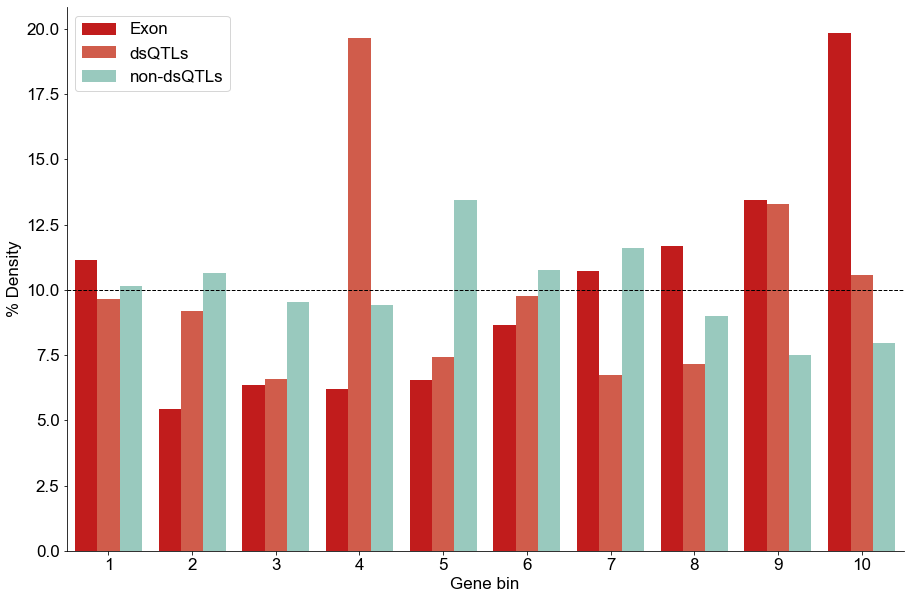

In [126]:
nb_bin = 10
cutoff = 0.5
palette = ['#DC0000', '#E64B35', '#91D1C2']


exons_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_test2'])
exons_df['Type'] = 'Exon'
sqtl_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location_test2'])

concat_df_distribution_ratios = pd.concat([exons_df, sqtl_df])

concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[
    (concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & 
    (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & (concat_df_distribution_ratios['Cutoff'] == 0.5)
]
concat_df_distribution_ratios['Type'] = concat_df_distribution_ratios['Type'].replace({False : 'non-dsQTLs', True : 'dsQTLs'})


plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Type', palette=palette)
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(ncol=1)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
# plt.title('Cutoff : {}'.format(cutoff))

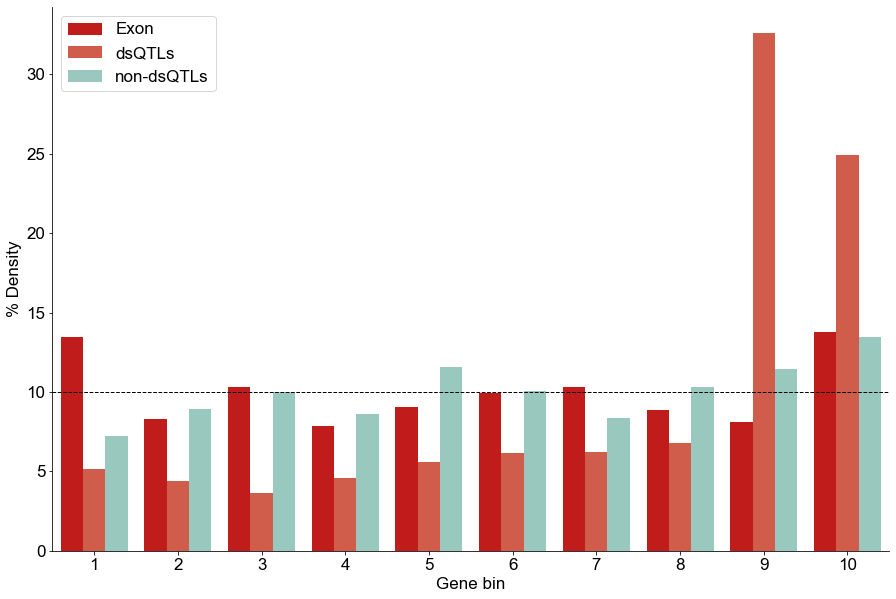

In [127]:
nb_bin = 10
cutoff = 0.5
palette = ['#DC0000', '#E64B35', '#91D1C2']


exons_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_specific'])
exons_df['Type'] = 'Exon'
sqtl_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location_specific'])

concat_df_distribution_ratios = pd.concat([exons_df, sqtl_df])

concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[
    (concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & 
    (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & (concat_df_distribution_ratios['Cutoff'] == 0.5)
]
concat_df_distribution_ratios['Type'] = concat_df_distribution_ratios['Type'].replace({False : 'non-dsQTLs', True : 'dsQTLs'})


plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Type', palette=palette)
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(ncol=1)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
# plt.title('Cutoff : {}'.format(cutoff))

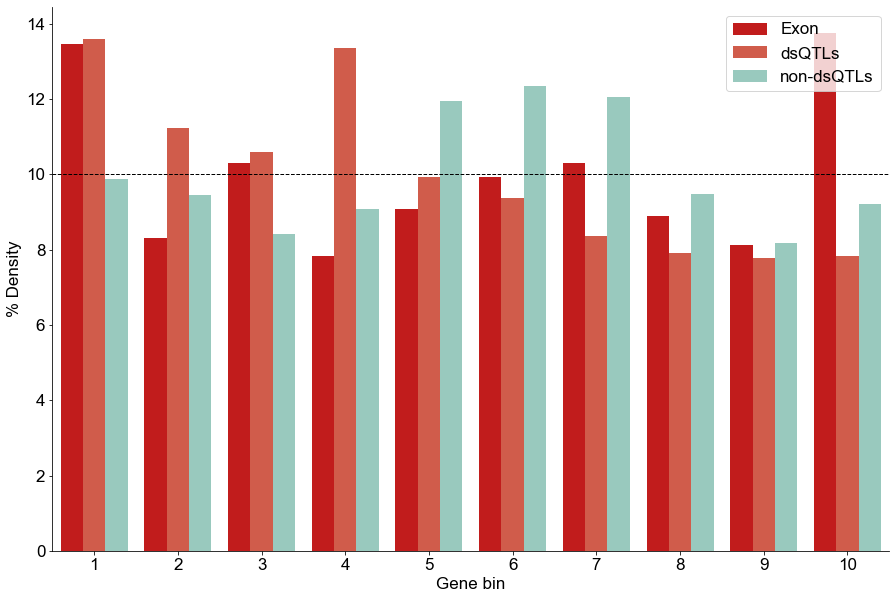

In [133]:
nb_bin = 10
cutoff = 0.5
palette = ['#DC0000', '#E64B35', '#91D1C2']


exons_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_cutoff'])
exons_df['Type'] = 'Exon'
sqtl_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location_cutoff'])

concat_df_distribution_ratios = pd.concat([exons_df, sqtl_df])

concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[
    (concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & 
    (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & (concat_df_distribution_ratios['Cutoff'] == 0.5)
]
concat_df_distribution_ratios['Type'] = concat_df_distribution_ratios['Type'].replace({False : 'non-dsQTLs', True : 'dsQTLs'})


plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Type', palette=palette)
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(ncol=1)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
# plt.title('Cutoff : {}'.format(cutoff))

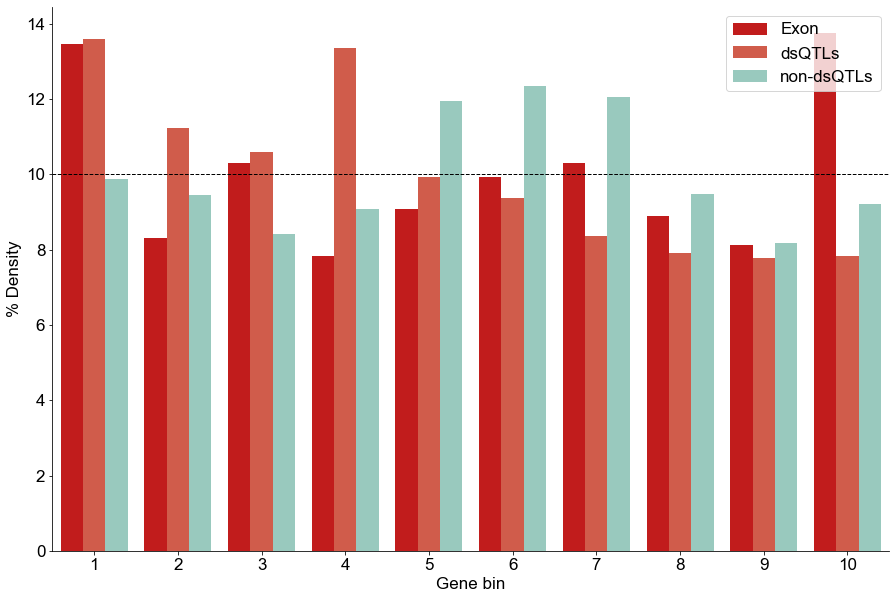

In [130]:
nb_bin = 10
cutoff = 0.5
palette = ['#DC0000', '#E64B35', '#91D1C2']


exons_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location_cutoff'])
exons_df['Type'] = 'Exon'
sqtl_df = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location_cutoff'])

concat_df_distribution_ratios = pd.concat([exons_df, sqtl_df])

concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[
    (concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & 
    (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & (concat_df_distribution_ratios['Cutoff'] == 0.5)
]
concat_df_distribution_ratios['Type'] = concat_df_distribution_ratios['Type'].replace({False : 'non-dsQTLs', True : 'dsQTLs'})


plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Type', palette=palette)
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(ncol=1)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
# plt.title('Cutoff : {}'.format(cutoff))